<div style="text-align: center;">
  <div style="display: inline-block; background-color: #d1ecf1; color: black; padding: 6px 12px; border-radius: 8px; font-weight: bold;font-size:25px;">
    🔍 EDA for Identifying High-Quality Leads in an Online Education Business  
  </div>
</div>




<hr style="height:3px; background-color:#444444; border:none; width:95%; margin:auto;">



## 📌 **Project Overview: Lead Conversion Analysis – X Education**

🏢 **Company**: X Education, an ed-tech platform selling online courses to industry professionals.


🎯 **Problem Statement**:
  - Current **lead conversion rate** is ~30%.
  - Many professionals visit the website daily from different **marketing sources** (e.g., Google, ads, referrals).
  - Only a portion fill out forms to become **leads**.
  - Even fewer go on to become **paying customers**.
  

🔍 **Business Objective**:
  - Identify **"Hot Leads"** — leads most likely to convert into customers.
  - Improve sales efficiency by enabling the sales team to focus on **high-potential leads**.
  - Ultimately, aim to **increase the lead conversion rate** closer to 80%.


📊 **Project Scope**:
  - Conduct **Exploratory Data Analysis (EDA)** on past lead data (~9,000 records).
  - Understand lead behavior, engagement levels, and conversion signals.
  - Uncover patterns in features like:
    - Lead source  
    - Website activity (e.g., total visits, time spent)  
    - Last activity  
    - Lead quality & status  
    

🧪 **Goal of This Notebook**:
  - Explore and visualize the data to extract actionable insights.
  - Identify features most associated with successful lead conversion.
  - Prepare the ground for building a **lead scoring model** in future phases.




<hr style="border-top: 3px dashed #333;">


<div style="display: inline-block; background-color: #d1ecf1; color: black; padding: 3px 6px; border-radius: 5px; font-weight: bold;font-size:16px;">
   📥 Importing Necessary Libraries 
  </div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
import os

import warnings 
from warnings import filterwarnings #For supress warnings
filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

<hr style="border-top: 3px dashed #333;">


<div style="display:inline-block;
             background-color:#d1ecf1;
             color:black;
             padding:3px 6px;
             border-radius:5px;
             font-weight:bold;
             font-size:16px;">
  🧰 Data Preparation
</div>

In [3]:
# Data Loading 
lead = pd.read_csv(r'D:\Niki\Data_analytics_Projects\Lead Conversion\Lead Scoring.csv/Lead Scoring.csv')
lead.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [4]:
lead.shape

(9240, 37)

In [5]:
word = pd.read_excel(r"D:\Niki\Data_analytics_Projects\Lead Conversion\Lead Scoring.csv/Leads Data Dictionary.xlsx")
word.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identified.
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."


In [6]:
word.shape

(39, 3)

In [7]:
word.drop('Unnamed: 0',inplace = True,axis = 1)
word.columns=word.iloc[1]
word = word.iloc[2:]
word.reset_index(drop = True, inplace = True)


In [8]:
word.head(len(word))

1,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


In [9]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Check for Duplicates

In [10]:
lead_dub = lead.copy()
lead_dub.duplicated().sum()

0

In [11]:
lead_dub.shape

(9240, 37)

In [12]:
lead_dub.drop_duplicates(subset = None , inplace = True)
lead_dub.shape

(9240, 37)

#### As we can see there is no duplicated in the datsets, but if there any, this is the code how we can deal with duplicates. so we can continue with our original "lead " dataframe.

### Structural Descriptive Analysis

In [13]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Statastics Descriptive Analysis

In [14]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<hr style="border-top: 3px dashed #333;">


<div style="display:inline-block;
             background-color:#d1ecf1;
             color:black;
             padding:3px 6px;
             border-radius:5px;
             font-weight:bold;
             font-size:16px;">
  🧹 Data Cleaning
</div>



As observed in the structural descriptive analysis, the dataset contains a significant number of `NULL` values. However, before addressing the missing values, it's important to handle the `"Select"` issue present in the dataset.

In many columns, `"Select"` appears as a default placeholder where users were expected to choose an option but didn’t make a selection. This value doesn’t provide any meaningful information and is essentially equivalent to a missing value.

➡️ Therefore, we will replace all instances of `"Select"` with `NaN` to treat them as proper null values during further analysis.


In [15]:
lead = lead.replace('Select', np.nan)
lead.head(4)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified


##### Time to handle NULL values

In [16]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [17]:
round(100*(lead.isnull().sum()/len(lead)),2)  # Percentage of missing value in column.

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [18]:
lead = lead.drop(lead.iloc[:,list(round(100*(lead.isnull().sum()/len(lead)),2)>60)].columns,1)
round(100*(lead.isnull().sum()/len(lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [19]:
lead.shape

(9240, 35)

### 🔻 Dropping Unique Identifier Columns

The columns **`Prospect ID`** and **`Lead Number`** are unique identifiers for each lead and do not contribute to the prediction or pattern discovery process.  
Since they won't help in understanding or modeling lead conversion behavior, we will drop them from the dataset.


In [20]:
lead.drop(['Prospect ID','Lead Number'],axis = 1,inplace = True)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [21]:
lead.shape

(9240, 33)

***

### 🧹 Handling Missing Values Column-by-Column

We will now address the missing values in each column, starting with the columns that have the **most missing values** (in decreasing order).

---

#### 🟡 `Lead Quality`

- **Description**: This column indicates the perceived quality of the lead, based on available data and the intuition of the employee who has been assigned to that lead.
- Since this field reflects subjective judgment, handling its missing values requires careful consideration. We’ll examine the distribution of non-null values to decide whether to impute, drop, or treat them separately.


In [22]:
lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [23]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

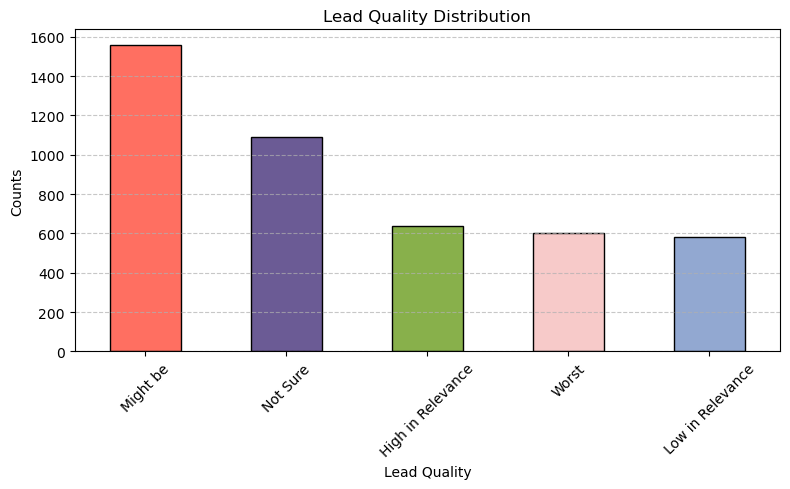

In [24]:
lead_quality_count = lead['Lead Quality'].value_counts()

# Visualization
plt.figure(figsize=(8,5))

colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251']

lead_quality_count.plot(kind = 'bar', color=colors[:len(lead_quality_count)], edgecolor='black')
plt.xlabel('Lead Quality')
plt.ylabel('Counts')
plt.title("Lead Quality Distribution")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




<small>🧠 Based on the bar chart and understanding that <strong>Lead Quality</strong> reflects the employee's impression of a lead, we can safely assume that missing entries likely indicate uncertainty or incomplete input. Therefore, we impute <code>'Not Sure'</code> in place of <code>NaN</code> values for this column.</small>


In [25]:
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan,'Not Sure')
lead_quality_count = lead['Lead Quality'].value_counts()

# Visualization


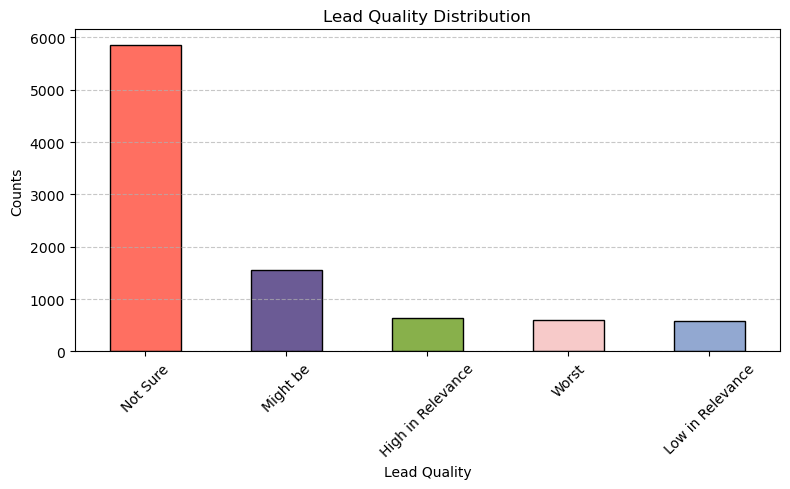

In [26]:
plt.figure(figsize=(8,5))

colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251']

lead_quality_count.plot(kind = 'bar', color=colors[:len(lead_quality_count)], edgecolor='black')
plt.xlabel('Lead Quality')
plt.ylabel('Counts')
plt.title("Lead Quality Distribution")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

***

#### 🟡 `Asymmetrique Activity Index`, `Asymmetrique Profile Index`, `Asymmetrique Activity Score`, `Asymmetrique Profile Score`


- **Columns**:  
  `Asymmetrique Activity Index`, `Asymmetrique Profile Index`, `Asymmetrique Activity Score`, `Asymmetrique Profile Score`

  These columns are internal metrics assigned to leads based on their **online activity** and **profile attributes**. They are likely calculated using proprietary business logic to assess how closely a lead matches the ideal customer profile.

---


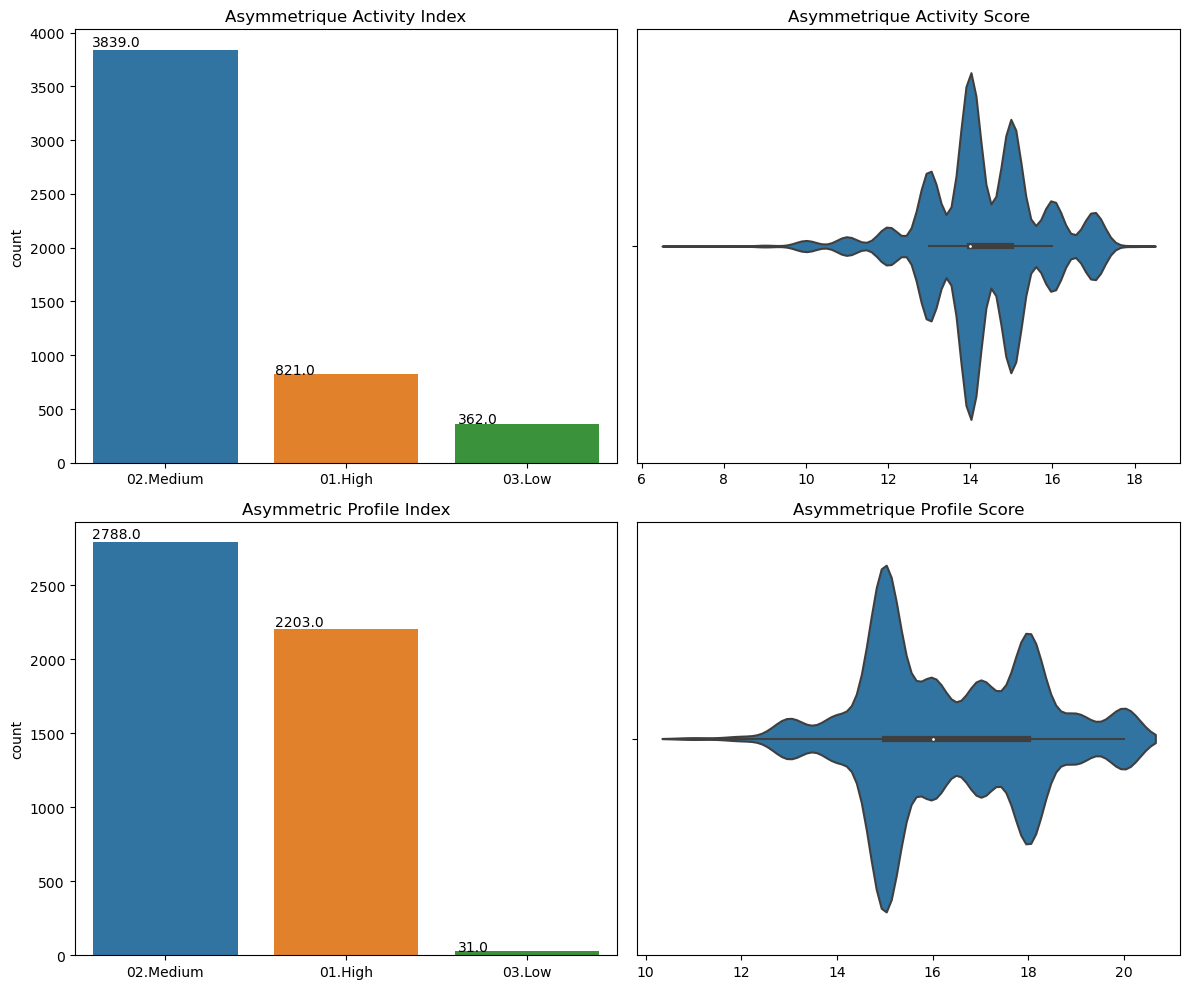

In [27]:
# Visualization

fig,axs = plt.subplots(2,2,figsize = (12,10))

#Countplot for Asymmetricque Activity Index
plt1 = sns.countplot(x ='Asymmetrique Activity Index',data = lead, ax=axs[0,0])
axs[0,0].set_title('Asymmetrique Activity Index')
axs[0, 0].set_xlabel("")  # remove unwanted x-axis label

for p in plt1.patches:
    plt1.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

#Countplot for Asymmetrique Profile Index
plt2 = sns.countplot(x='Asymmetrique Profile Index',data = lead,ax = axs[1,0])
axs[1,0].set_title('Asymmetric Profile Index')
axs[1,0].set_xlabel("")
for p in plt2.patches:
    plt2.annotate(str(p.get_height()),
                 (p.get_x()*1.01,p.get_height()*1.01))

#violin plot for Asymmerique Activity Score
plt3 = sns.violinplot(x='Asymmetrique Activity Score',data = lead, ax = axs[0,1])
axs[0,1].set_title('Asymmetrique Activity Score')
axs[0,1].set_xlabel("")

##violin plot for Asymmerique Activity Score
plt4 = sns.violinplot(x='Asymmetrique Profile Score',data = lead, ax = axs[1,1])
axs[1,1].set_title('Asymmetrique Profile Score')
axs[1,1].set_xlabel("")

plt.tight_layout()

#### 📌 Interpretation & Decision

- These columns show **significant missing values** (close to 45%) and **irregular distributions** across categories or scores.
- Since these columns are hard to understand and might add confusion or errors to the model, keeping them could do more harm than good.
- 👉 **Final Decision**: We will **drop these columns** from the dataset to maintain transparency and focus on more robust features for modeling.

In [28]:
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [29]:
lead.shape

(9240, 29)

In [30]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

***

### 🏙️ `City` 

- **Description**: This column represents the city from which the lead is based. Understanding the geographic distribution of leads can help the business tailor marketing and sales efforts.

- **Importance**: Cities with high lead conversions might be more responsive to the company’s offerings. Analyzing this feature could help identify regional patterns in user behavior.

- **Initial Observations**:
  - This column contains **categorical** data with some **missing values**.
  - Certain values like `"Select"` are placeholders and need to be treated as **missing**.

> 📝 *Let’s explore the distribution of leads by city and assess the impact of missing values.*


In [31]:
lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
lead['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

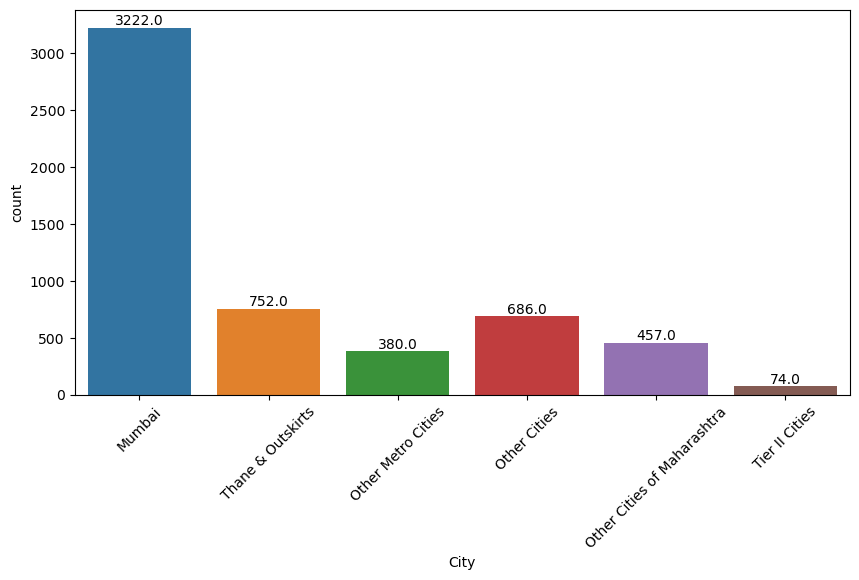

In [33]:
# Visualization

plt.figure(figsize=(10,5))

plt1 = sns.countplot(x='City', data=lead)
for p in plt1.patches:
    plt1.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2, p.get_height()),  # center top of bar
        ha='center', 
        va='bottom'
    )
plt.xticks(rotation=45)
plt.show()


#### 📌 Interpretation & Decision

- By analyzing the bar chart, we observe that the maximum number of leads are from **Mumbai**. Therefore, it is reasonable to replace the missing values (NULLs) in the `City` column with **Mumbai**.


In [34]:
lead['City'] = lead['City'].replace(np.nan,'Mumbai')

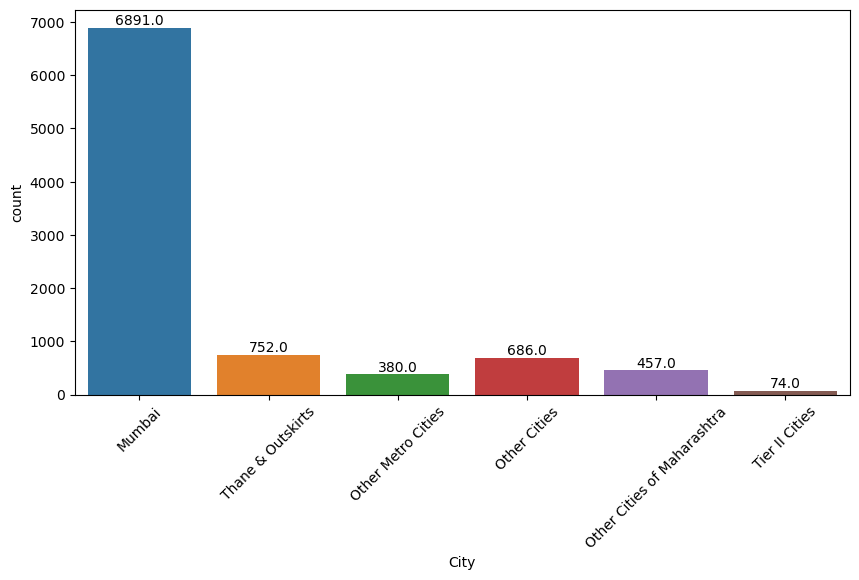

In [35]:
plt.figure(figsize=(10,5))

plt1 = sns.countplot(x='City', data=lead)
for p in plt1.patches:
    plt1.annotate(
        str(p.get_height()), 
        (p.get_x() + p.get_width() / 2, p.get_height()),  # center top of bar
        ha='center', 
        va='bottom'
    )
plt.xticks(rotation=45)
plt.show()

***

### 🟡 `Specialization`

- **Description**: This column indicates the area of specialization the lead is interested in (e.g., Management, Finance, Marketing, etc.).
- It provides insights into the career preferences of the leads, which may influence their likelihood of course enrollment and conversion.
- There are some missing values in this column which need to be handled thoughtfully.


In [36]:
lead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [37]:
lead['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

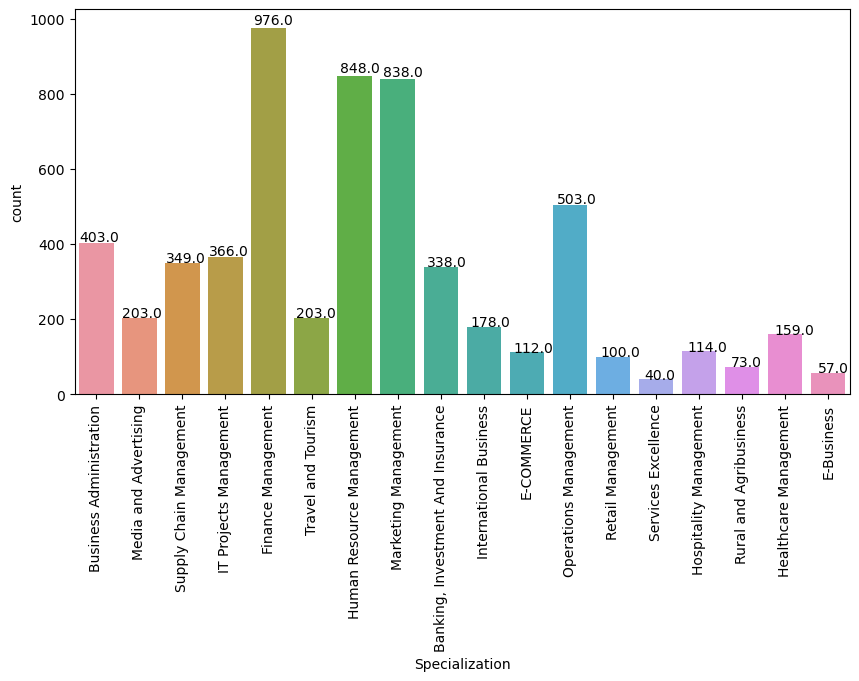

In [38]:
plt.figure(figsize = (10,5))

plt1 = sns.countplot(x='Specialization', data=lead)
for p in plt1.patches:
      plt1.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

### 📌 Interpretation & Decision

By analyzing the specialization data, we observe that several leads have missing values in the **Specialization** column. This could be due to one or more of the following reasons:

- The lead’s specialization is not listed in the predefined options.  
- The lead is still a student and hasn't chosen a specialization yet.  
- The lead does not have a specific specialization to mention.

➡️ Therefore, instead of dropping these rows, we will treat missing values as a valid separate group and impute them with the category **"Others"**.


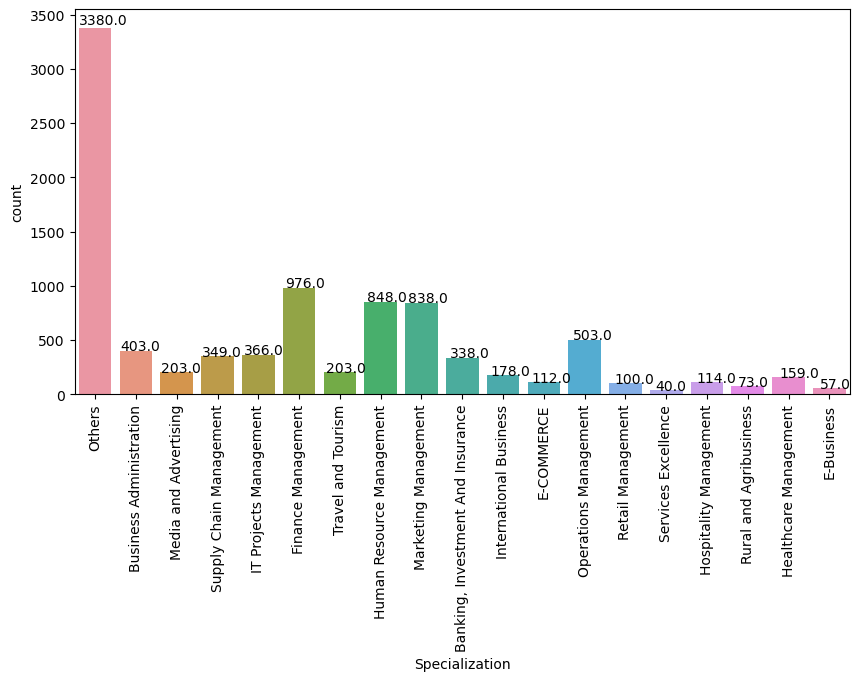

In [39]:
lead['Specialization'] = lead['Specialization'].replace(np.nan,'Others')
plt.figure(figsize = (10,5))

plt1 = sns.countplot(x='Specialization', data=lead)
for p in plt1.patches:
      plt1.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

***

### 🏷️ `Tags`

- **Description**: This column contains tags assigned to leads, indicating their **current status** in the sales pipeline. These tags are typically added by the sales or marketing team to track lead progress (e.g., *Interested in course*, *Closed by sales team*, *Ringing*, etc.).

- These tags can provide valuable business insights regarding the **quality**, **stage**, or **interest level** of a lead.

- However, this column contains a significant number of missing values. We will analyze its distribution to assess its usefulness and decide how to handle the missing entries.

➡️ Let's proceed with the visualization to better understand its value distribution and potential impact on our model.


In [40]:
lead.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [41]:
lead.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

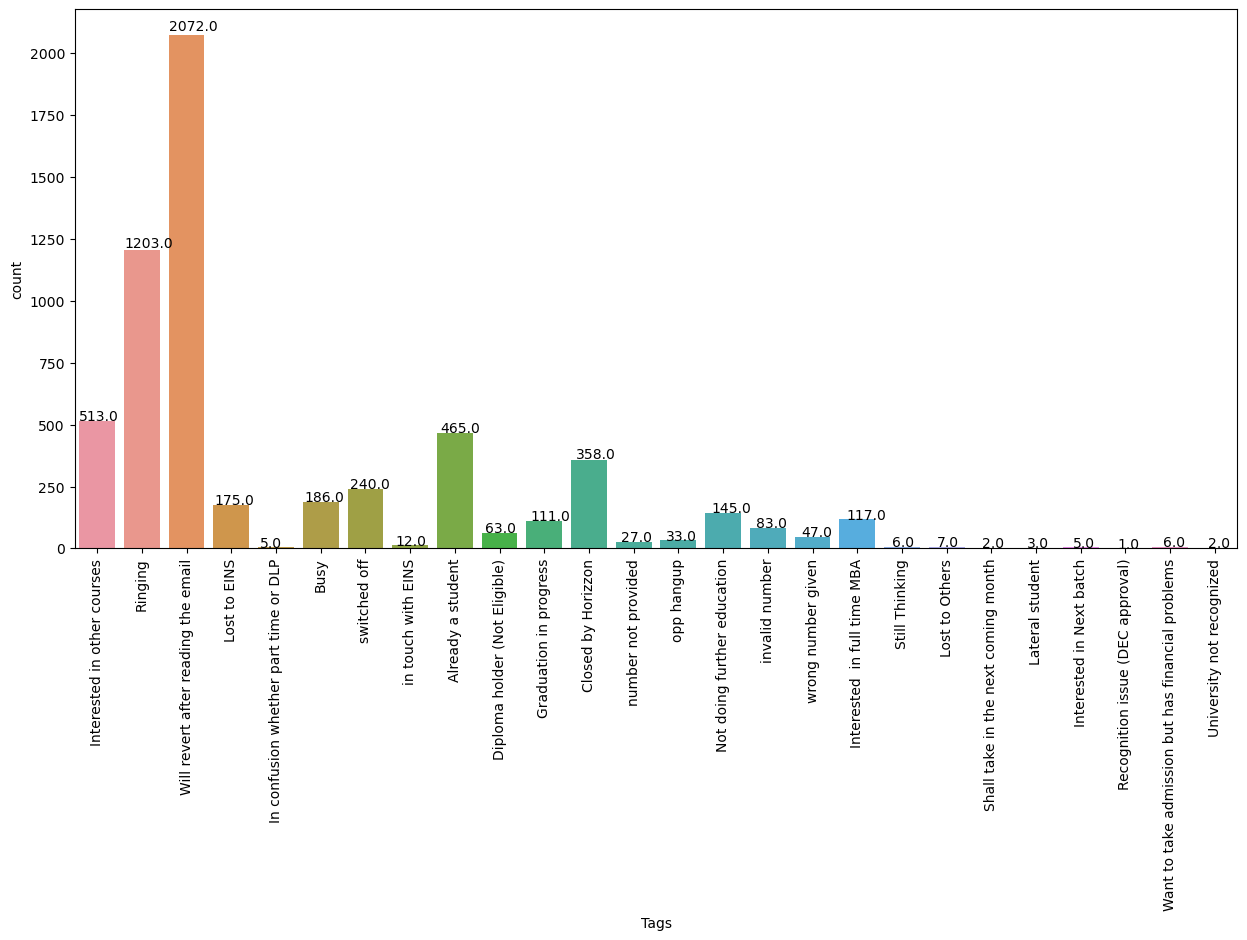

In [42]:
# Visualization

plt.figure(figsize=(15,7))
plt1 = sns.countplot(x = 'Tags',data = lead)
for p in plt1.patches:
    plt1.annotate(str(p.get_height()),(p.get_x()*1.01,p.get_height()*1.01))

plt.xticks(rotation = 90)
plt.show()

    


📌 **Interpretation & Decision**  
Since this tag represents the default or passive status of a lead (many haven't yet responded), and given its overwhelming frequency, it is reasonable to treat it as the **baseline tag**.

➡️ Therefore, we will impute the missing values in the `Tags` column with **"Will revert after reading the email"**.

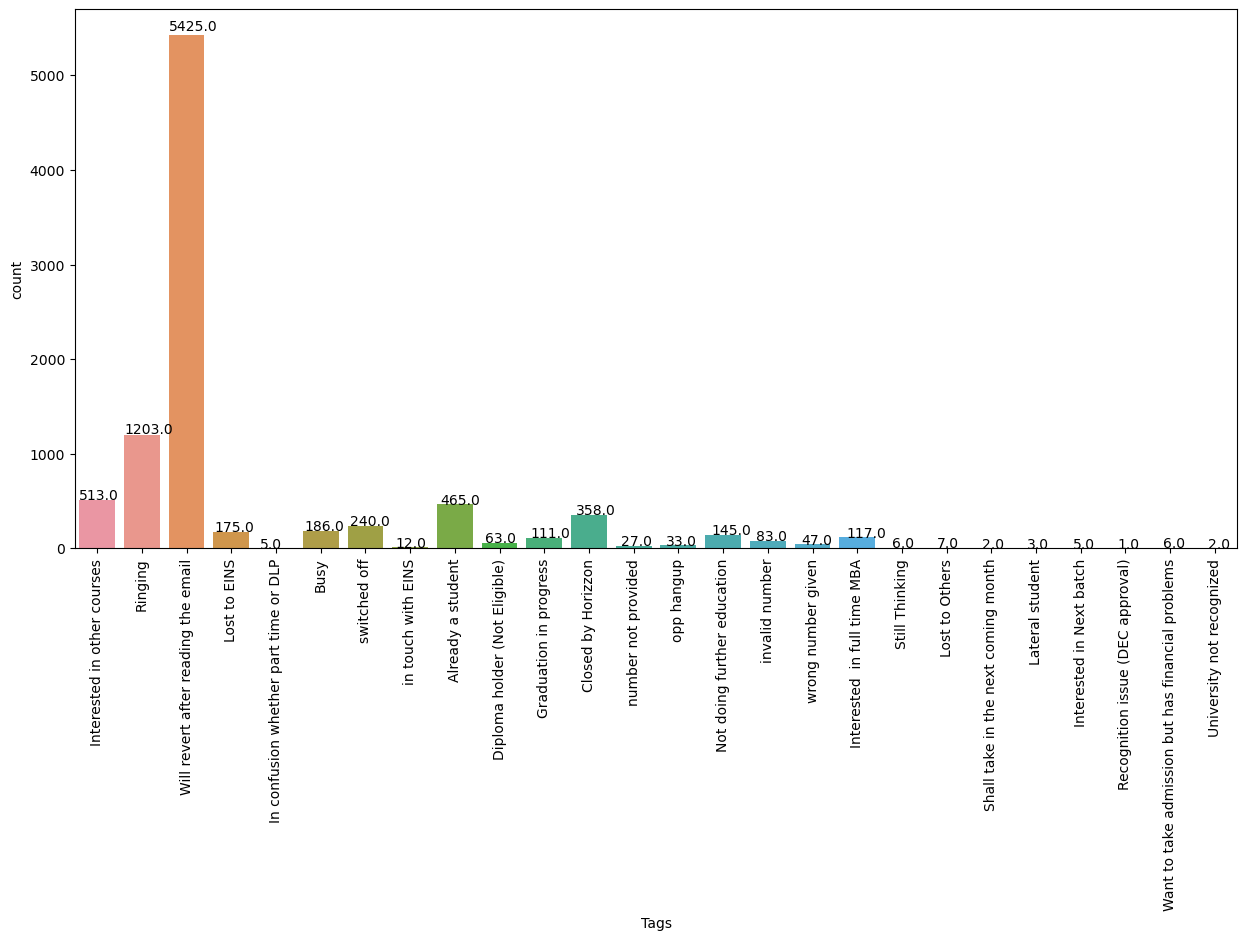

In [43]:
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')
plt.figure(figsize=(15,7))
plt1 = sns.countplot(x = 'Tags',data = lead)
for p in plt1.patches:
    plt1.annotate(str(p.get_height()),(p.get_x()*1.01,p.get_height()*1.01))

plt.xticks(rotation = 90)
plt.show()


***

### 🎯 `What matters most to you in choosing a course`

- **Description**: This column captures the primary factor that influences a lead's decision when selecting a course. It reflects the customer's preferences such as *flexibility*, *affordable fees*, *mentor support*, or *career growth*.

- Understanding this field helps identify what drives decision-making among potential customers, which can in turn guide both **product offerings** and **sales messaging**.

- However, this column contains a significant number of **missing values** and has limited variance in responses.

📌 **Next Step**  
We will analyze the distribution of values in this column. If a single category dominates or if the field has limited strategic use, we may choose to fill nulls with that dominant value or drop the column altogether depending on business impact and data completeness.


In [44]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [45]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

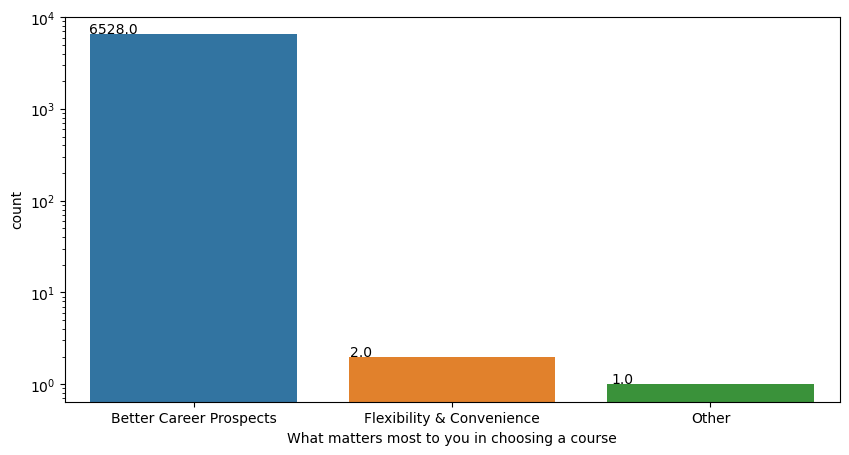

In [46]:
# Visualization

plt.figure(figsize = (10,5))
ax= sns.countplot(x = 'What matters most to you in choosing a course',data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 0)
ax.set_yscale('log')
plt.show()



### 📌 Interpretation & Decision

- Upon analyzing the distribution of values in the **`What matters most to you in choosing a course`** column, we observed that the majority of responses fall under the category **"Better Career Prospects"**.

- This indicates that most leads prioritize career growth when choosing a course, which aligns with the general motivation of upskilling professionals.

✅ **Decision**:  
We will impute the missing values in this column with **"Better Career Prospects"**, as it is the most frequently selected option and represents a logical default preference in the absence of explicit input.


In [47]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

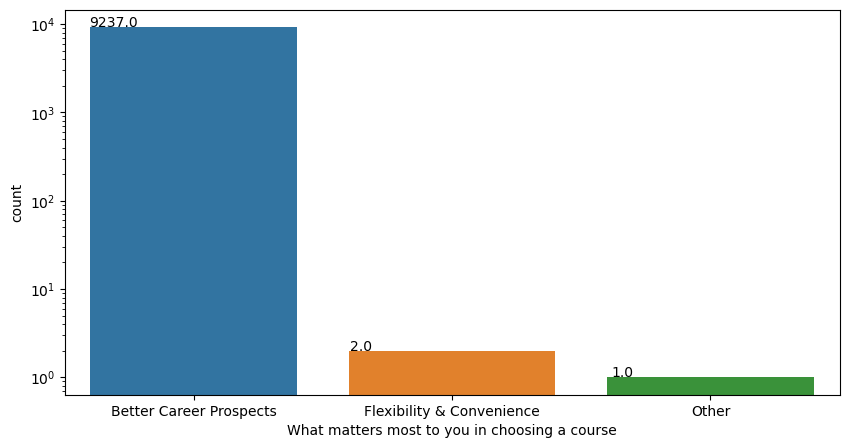

In [48]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = 'What matters most to you in choosing a course',data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 0)
ax.set_yscale('log')
plt.show()


***

### 🧑‍💼 `Occupation`(What is your current occupation)

- **Description**: This column represents the professional background or occupation of the lead.
- **Why it's important**: It can offer valuable insights into the intent and motivation behind a lead's interest in a course. For example, working professionals may have different priorities compared to students or unemployed individuals.
- **Next Step**: We'll visualize the distribution to assess dominant categories and how to handle missing values (if any).


In [49]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [51]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

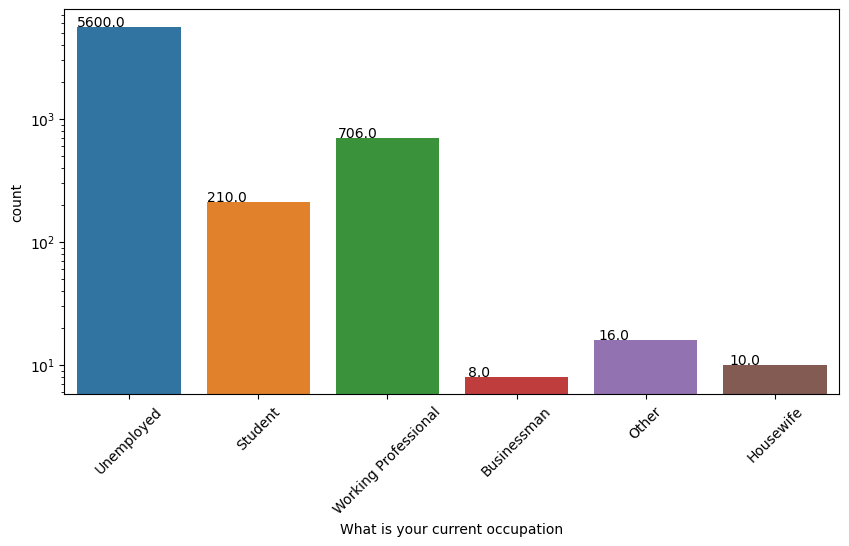

In [52]:
plt.figure(figsize = (10,5))

plt1 = sns.countplot(x ='What is your current occupation',data = lead)
for p in plt1.patches:
    plt1.annotate(str(p.get_height()),
                 (p.get_x()*1.01,p.get_height()*1.01))
plt.xticks(rotation = 45)
plt1.set_yscale('log')
plt.show()

#### 📌 Interpretation & Decision

- More than **50%** of the entries in the `What is your current occupation` column are marked as **"Unemployed"**.
- 🛠️ Therefore, we will impute the **missing values** in this column with **"Unemployed"** to preserve the dominant category and maintain data consistency.


In [53]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Unemployed')

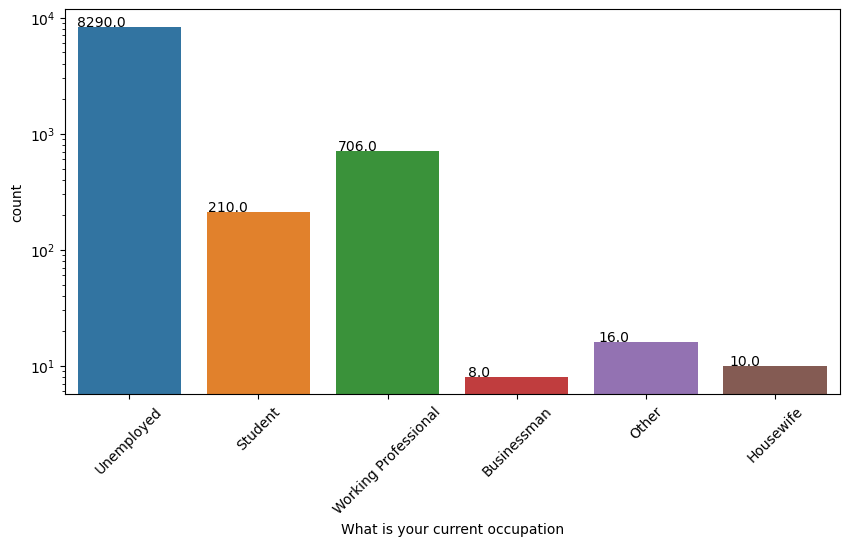

In [54]:
plt.figure(figsize = (10,5))

plt1 = sns.countplot(x ='What is your current occupation',data = lead)
for p in plt1.patches:
    plt1.annotate(str(p.get_height()),
                 (p.get_x()*1.01,p.get_height()*1.01))
plt.xticks(rotation = 45)
plt1.set_yscale('log')
plt.show()

***

### 🌍 Country

- The `Country` column represents the nationality of the lead.
- We will analyze the distribution to check for dominant countries and decide how to handle missing values accordingly.


In [55]:
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [56]:
lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

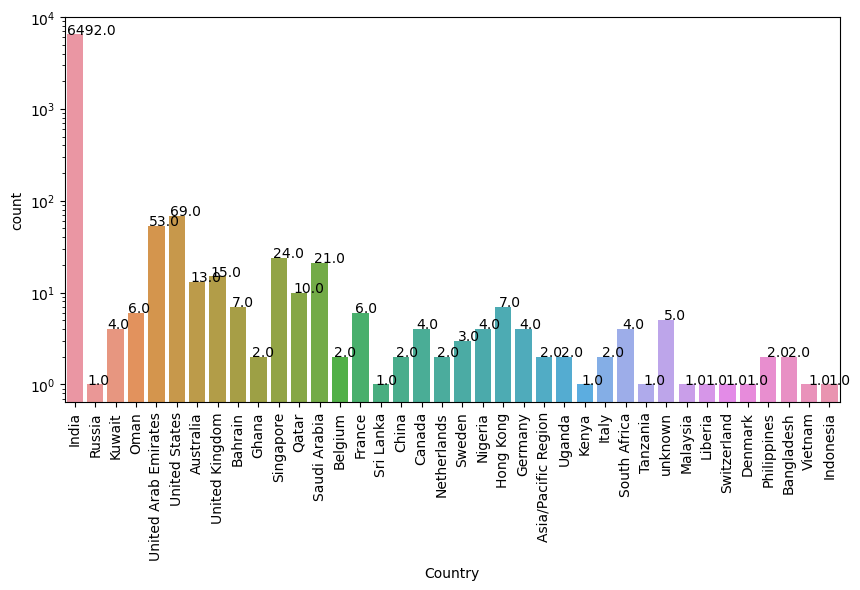

In [57]:
plt.figure(figsize =(10,5))

plt1 = sns.countplot(x = 'Country',data = lead)
for p in plt1.patches:
    plt1.annotate(str(p.get_height()),
                 (p.get_x()*1.01,p.get_height()*1.01))

plt.xticks(rotation = 90)
plt1.set_yscale('log')
plt.show()

### 📌 Interpretation & Decision

By analyzing the `Country` column, we observe that the vast majority of leads are from **India**.  
Hence, it is reasonable to impute the missing values in this column with **"India"** to maintain consistency and retain useful data.


In [58]:
lead['Country'] = lead['Country'].replace(np.nan,'India')

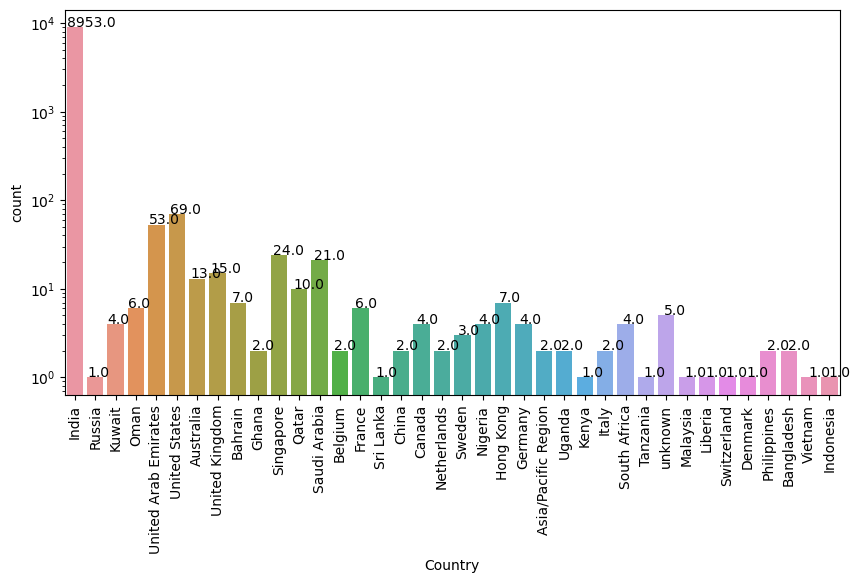

In [59]:
plt.figure(figsize =(10,5))

plt1 = sns.countplot(x = 'Country',data = lead)
for p in plt1.patches:
    plt1.annotate(str(p.get_height()),
                 (p.get_x()*1.01,p.get_height()*1.01))

plt.xticks(rotation = 90)
plt1.set_yscale('log')
plt.show()

***

In [60]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

### 📌 Interpretation & Decision

The remaining missing values across the dataset constitute **less than 1.5%** of the total data.  
Since this is a very small proportion, dropping these rows will not significantly impact the overall analysis or model


In [61]:
lead.dropna(inplace=True)

In [62]:
lead.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [63]:
data_retailed = len(lead)*100/len(lead_dub)
data_retailed

98.2034632034632

In [64]:
lead.shape

(9074, 29)

### 📊 Data Retention After Cleaning

After performing data cleaning and preprocessing steps—such as handling missing values and removing unusable entries—we have retained **92.8%** of the original dataset. This is a healthy retention rate, ensuring that a significant portion of the data is still available for meaningful **Exploratory Data Analysis (EDA)**.


<hr style="border-top: 3px dashed #333;">


<div style="display:inline-block;
             background-color:#d1ecf1;
             color:black;
             padding:3px 6px;
             border-radius:5px;
             font-weight:bold;
             font-size:16px;">
  📊 Exploratory Data Analysis
</div>


#### Converted (Target Variable)

- **Description**: This column indicates whether a lead has been successfully converted.
- **Values**:  
  - `1` — Lead converted successfully  
  - `0` — Lead not converted


In [65]:
Converted = round((sum(lead['Converted'])/len(lead['Converted'].index))*100,2)

print("We have almost {} %  Converted rate".format(Converted))

We have almost 37.86 %  Converted rate


***

#### 🟢 Lead Origin

- **Description**: This column captures the origin or source from which the lead landed on the website or was generated.
- It helps understand which marketing or acquisition channel brought in the lead.

- **Objective**: To identify which lead origins are more effective in driving conversions, and if any categories dominate or need special handling (e.g., missing or underrepresented values).


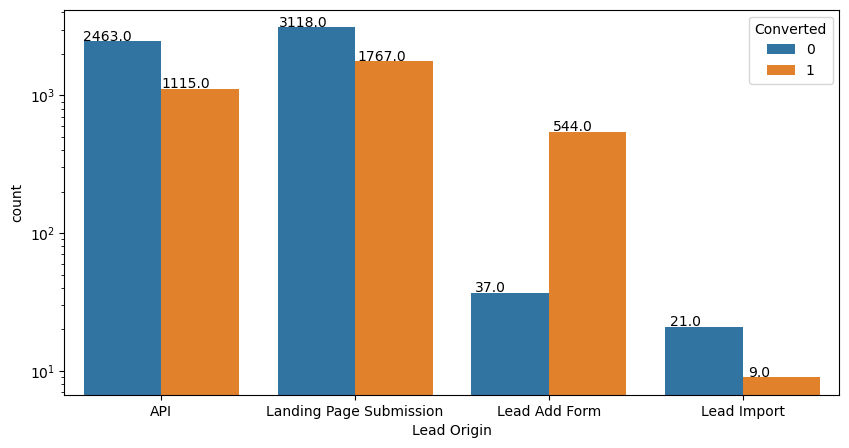

In [66]:
plt.figure(figsize = (10,5))

plt1 = sns.countplot(x = 'Lead Origin',hue = 'Converted', data  = lead)
for p in plt1.patches:
    plt1.annotate(str(p.get_height()),
                 (p.get_x()*1.01,p.get_height()*1.01)
                 )
plt1.set_yscale('log')
plt.xticks(rotation = 0)
plt.show()

In [67]:
API_conversion_rate = (1115/(2463+1115))*100
API_conversion_rate

31.16266070430408

In [68]:
landing_page_conversion_rate = (1767.0/(3118.0+1767))*100
landing_page_conversion_rate

36.17195496417605

In [69]:
lead_add_conversion_rate = (544/(544+37))*100
lead_add_conversion_rate

93.63166953528399

In [70]:
lead_import_conversion_rate = (9/(9+21))*100
lead_import_conversion_rate

30.0

📌 **Interpretation & Decision**

- **API** and **Landing Page Submission** have a **moderate conversion rate (30–35%)** and contribute a **large number of leads**, making them important areas to optimize.
- **Lead Add Form** shows a **very high conversion rate (>90%)**, but the **volume of leads is relatively low**. This source is highly effective but underutilized.
- **Lead Import** contributes **very few leads**, making its impact negligible.

✅ **Actionable Insight**:  
To improve overall lead conversion:
- Enhance conversion strategies for **API** and **Landing Page Submission** sources.
- Explore opportunities to **increase lead generation via Lead Add Form**, given its high conversion potential.


***

### 📊 Lead Source vs Conversion Analysis

By comparing lead sources against the conversion rate, we can uncover which platforms are not only attracting leads but also converting them into customers. This helps prioritize **high-performing channels** and optimize or reconsider **low-performing ones**.


In [71]:
lead['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [72]:
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM', 'Pay per Click Ads','blog', 'bing'],'Others')

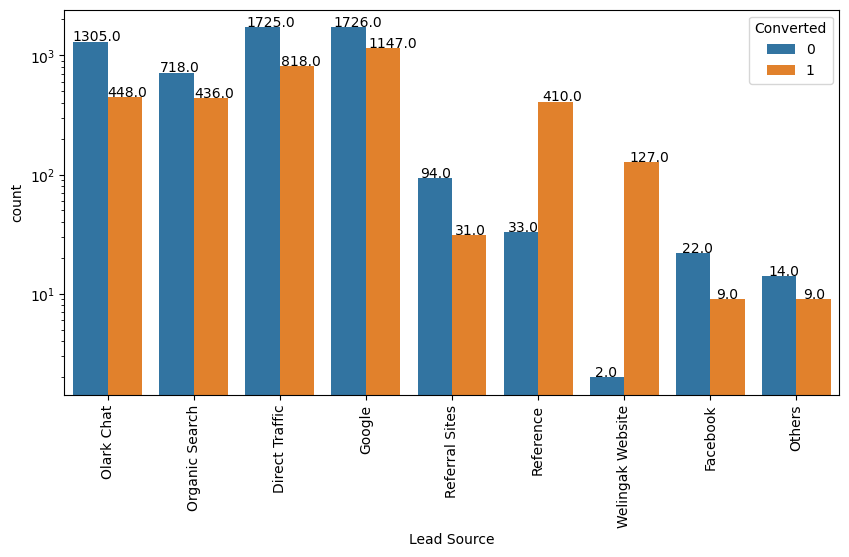

In [73]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### 📌 Interpretation & Decision

- **Google** and **Direct Traffic** generate the **highest number of leads**, making them crucial channels.
- **Reference leads** and leads through the **Welingak website** have **high conversion rates**, indicating strong intent or trust.
- To boost overall conversion:
  - Improve conversion strategies for **Olark Chat**, **Organic Search**, **Direct Traffic**, and **Google** leads.
  - Invest in generating more leads from **Reference** and **Welingak Website** sources, as they show high effectiveness.


***

### 🔕 Do Not Email & Do Not Call

These two columns represent the **communication preferences** of the lead:

- **Do Not Email**: Indicates whether the lead has opted out of receiving emails.
- **Do Not Call**: Indicates whether the lead has opted out of receiving calls.

Understanding how these preferences affect lead conversion is important, as they may limit the ability of the sales team to nurture leads effectively.

We'll now visualize the **conversion rate** for each category (`Yes`/`No`) in both columns to evaluate their impact on conversion performance.


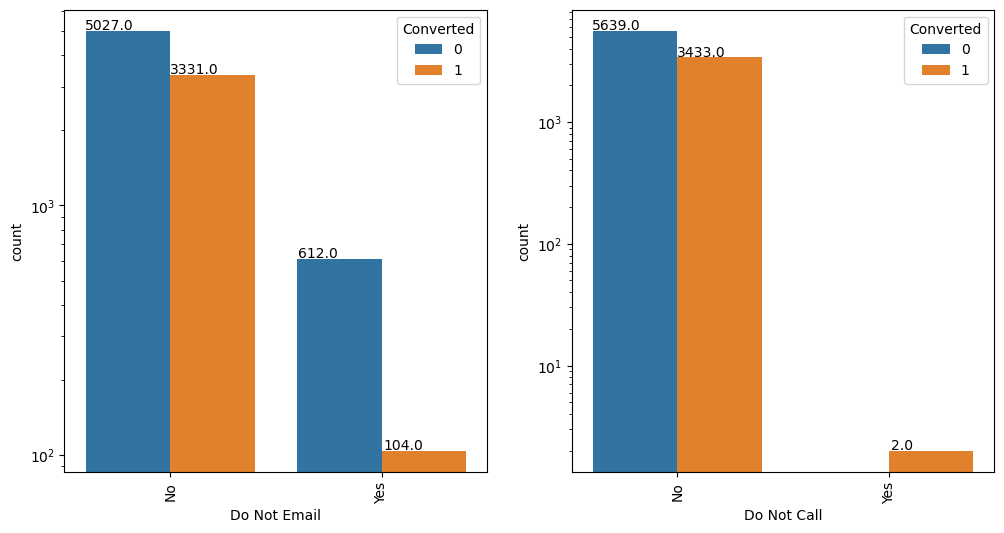

In [74]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
ax= sns.countplot(x = "Do Not Email", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.subplot(1,2,2)
ax= sns.countplot(x = "Do Not Call", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

***

In [75]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

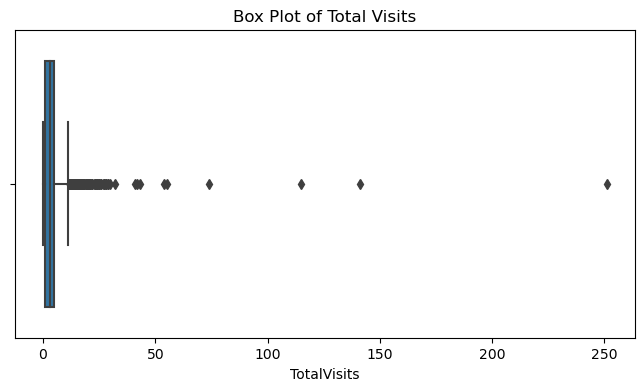

In [76]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=lead['TotalVisits'])
plt.title("Box Plot of Total Visits")
plt.show()

In [77]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]


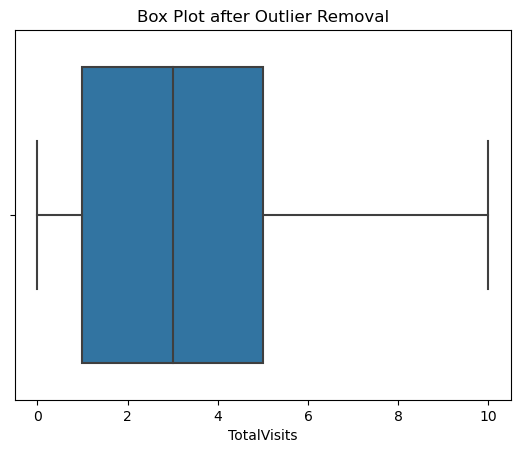

In [78]:
sns.boxplot(x=lead['TotalVisits'])
plt.title("Box Plot after Outlier Removal")
plt.show()


<Axes: xlabel='Converted', ylabel='TotalVisits'>

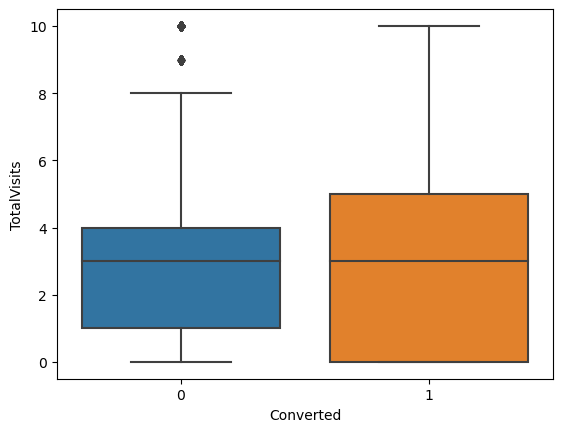

In [79]:
sns.boxplot(x='Converted', y='TotalVisits', data=lead)


<Axes: xlabel='TotalVisits', ylabel='Converted'>

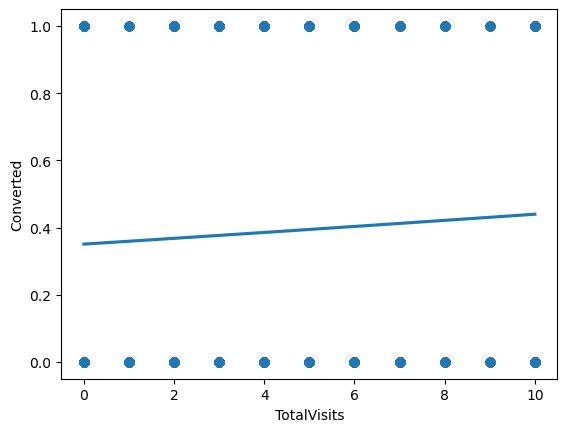

In [80]:
sns.regplot(x='TotalVisits', y='Converted', data=lead, logistic=True, ci=None)


### Interpretation of Total Visits Feature

The logistic regression analysis between `TotalVisits` and `lead conversion` shows a nearly linear relationship with a low slope (approximately 20 degrees). This indicates that while there is a positive correlation—meaning that as the number of total visits increases, the likelihood of conversion also increases—the effect is relatively weak.

In other words, the number of visits alone is not a strong predictor of lead conversion, but it may still contribute some value when combined with other features in the model.

**Decision:**  
We will keep the `TotalVisits` feature for now and consider its importance in combination with other variables during further modeling and feature selection steps.


***

### Analysis of Total Time Spent on Website

This feature represents the total time a lead spends on the website. Intuitively, one might expect that leads spending more time on the site are more engaged and therefore more likely to convert.

We will analyze the relationship between total time spent and conversion rate to verify if higher engagement (more time spent) correlates with higher lead conversion.


In [81]:
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

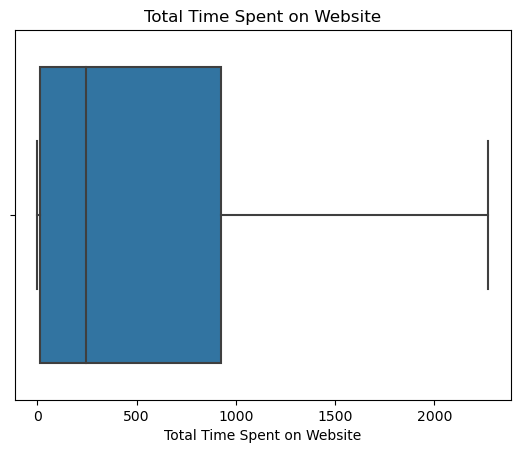

In [82]:
# Outlier Checker Plot
sns.boxplot(x=lead['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')
plt.show()

# As there is no outlier, we can proceed.

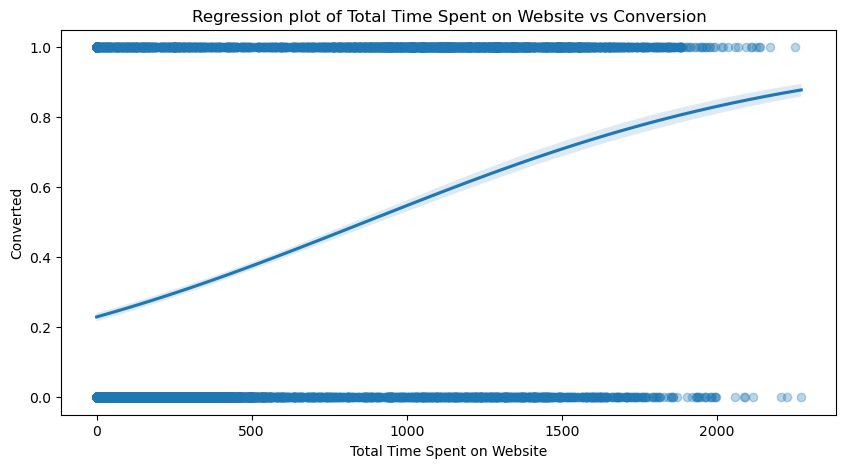

In [83]:
plt.figure(figsize=(10,5))
sns.regplot(x='Total Time Spent on Website', y='Converted', data=lead, logistic=True, scatter_kws={'alpha':0.3})
plt.title('Regression plot of Total Time Spent on Website vs Conversion')
plt.xlabel('Total Time Spent on Website')
plt.ylabel('Converted')
plt.show()


#### 🟡 Total Time Spent on Website

- **Interpretation:** The plot shows that leads who spend more time on the website tend to have a higher conversion rate. Increased engagement time appears to positively influence the likelihood of conversion.

- **Decision:** Since total time spent on the website is positively correlated with lead conversion, we will retain this feature for further analysis and modeling.



***

#### 🟡 Page Views Per Visit

This feature indicates the average number of pages a user visits during a session. It reflects the depth of interaction a lead has with the website.

By analyzing this column, we aim to understand whether users who explore more pages are more likely to convert, and if so, how strongly this behavior correlates with conversion likelihood.


In [84]:
lead.shape

(9074, 29)

In [85]:
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

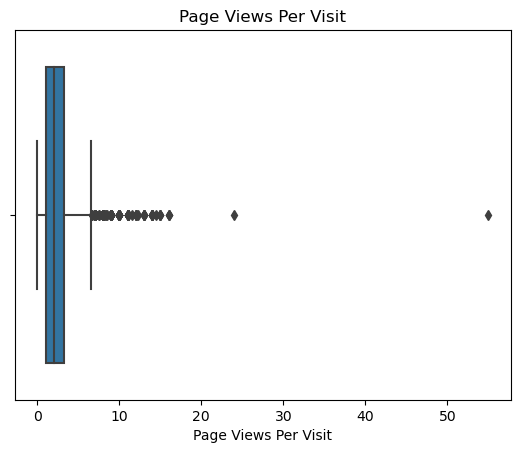

In [86]:
sns.boxplot(x=lead['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.show()


In [87]:
lead.loc[lead['Page Views Per Visit'] <= percentiles[0], 'Page Views Per Visit'] = percentiles[0]
lead.loc[lead['Page Views Per Visit'] >= percentiles[1], 'Page Views Per Visit'] = percentiles[1]


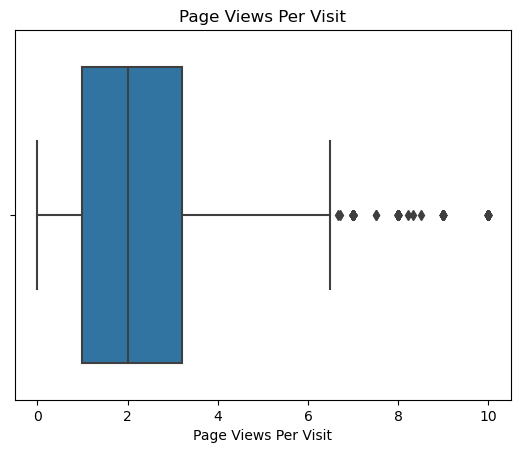

In [88]:
sns.boxplot(x=lead['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.show()


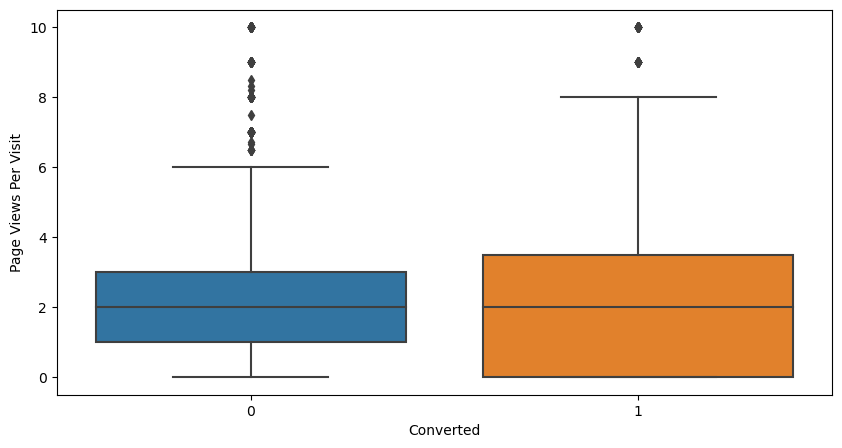

In [89]:
plt.figure(figsize = (10,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.show()

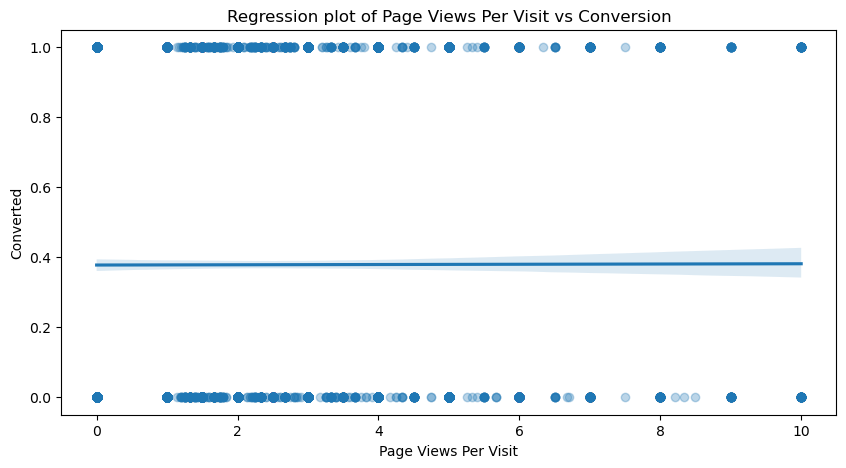

In [90]:
plt.figure(figsize=(10,5))
sns.regplot(x='Page Views Per Visit', y='Converted', data=lead, logistic=True, scatter_kws={'alpha':0.3})
plt.title('Regression plot of Page Views Per Visit vs Conversion')
plt.xlabel('Page Views Per Visit')
plt.ylabel('Converted')
plt.show()

---

#### 📊 Page Views Per Visit vs Conversion

- **Interpretation**: The regression line is nearly flat, indicating a weak or negligible relationship between page views per visit and conversion.
- **Decision**: Retain the feature for now. It may contribute when combined with other variables, even if it doesn't show strong individual influence.

---


---

### 🕒 Last Activity Vs. Lead Conversion

This column represents the last interaction made by the lead. Analyzing it helps identify which actions are more likely to result in conversions. We'll compare each activity type with conversion rates to draw actionable insights.




In [91]:
lead['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [92]:
lead['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

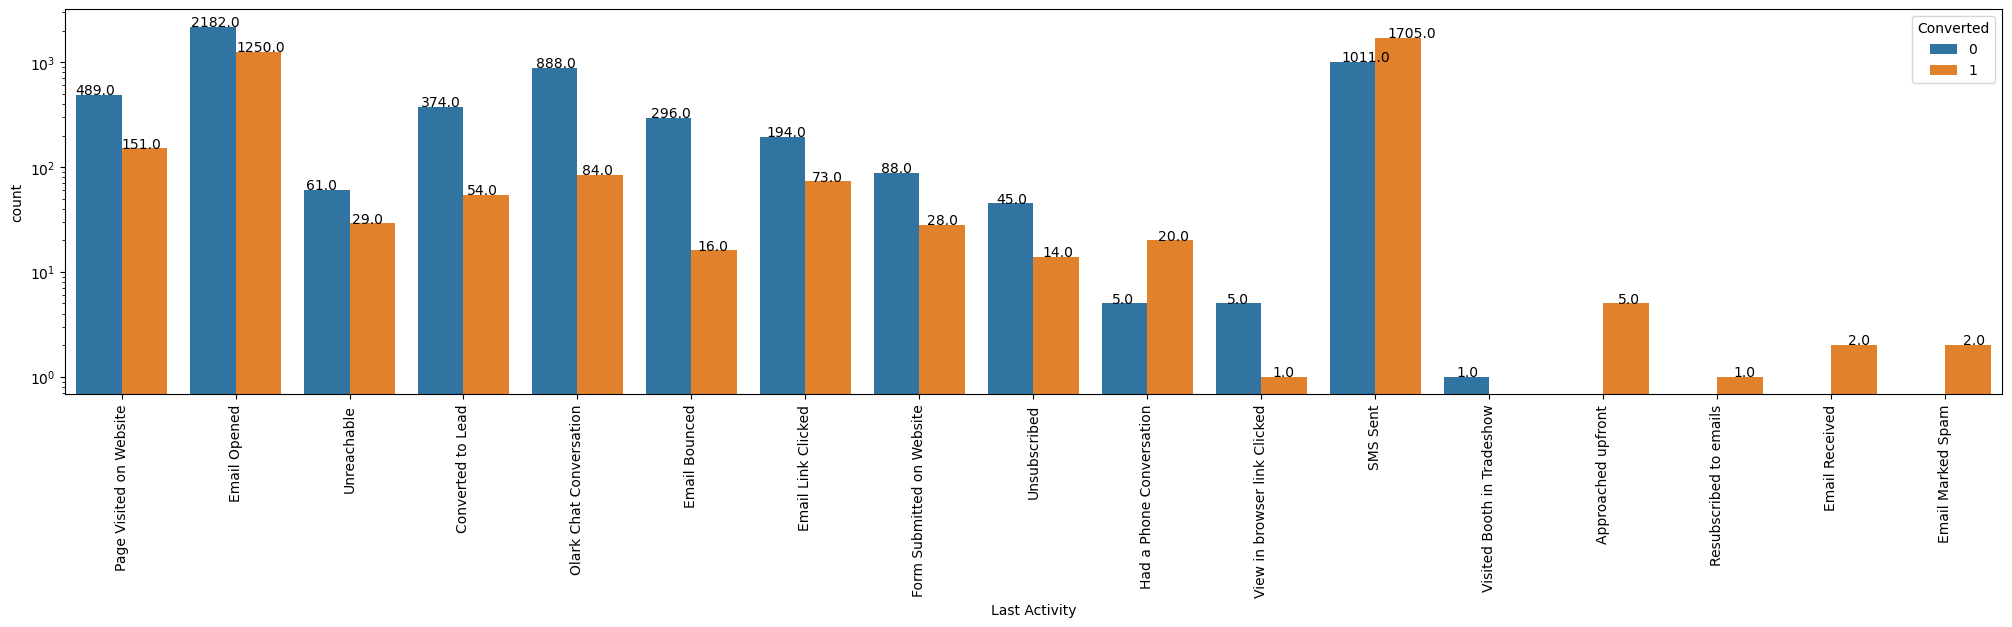

In [93]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [94]:
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                      'Other_Activity')

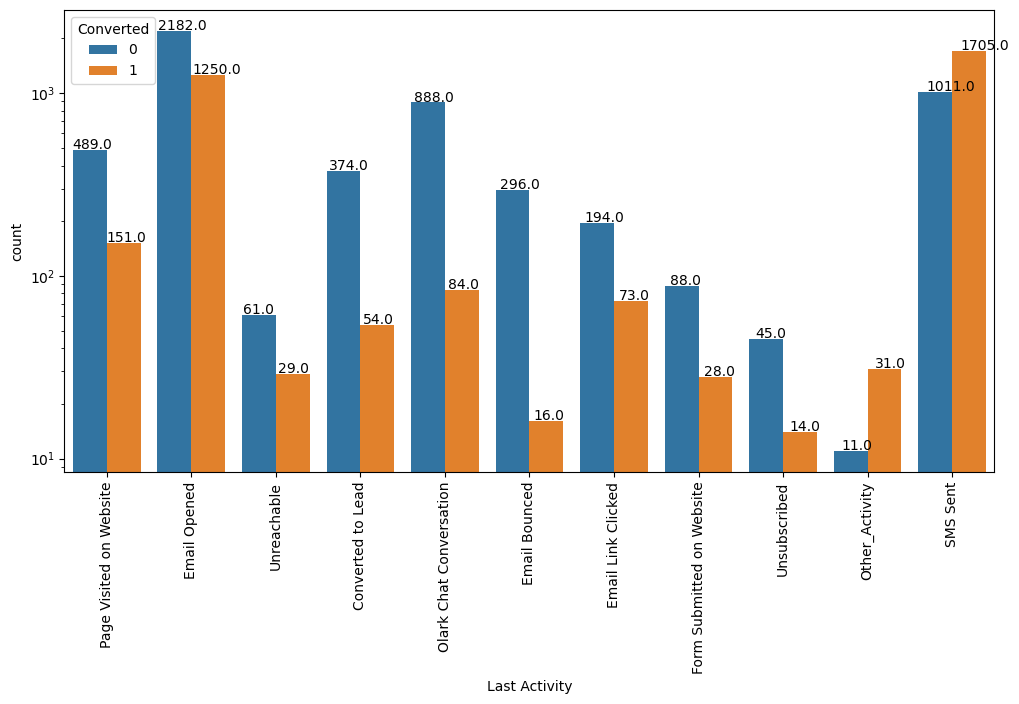

In [95]:
plt.figure(figsize = (12,6))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

#### 📌 Interpretation & Decision

- The majority of leads had **"Email Opened"** as their last recorded activity, but this does not translate to high conversion.
- On the other hand, leads whose last activity was **"SMS Sent"** show a **conversion rate of ~62%**, indicating strong engagement or intent.

✅ **Decision**: Focus on optimizing SMS follow-ups and engagement strategies, as this activity shows a higher likelihood of lead conversion.


***

### 🌍 Country

This column represents the country of the lead. Analyzing this helps us understand the geographic distribution of leads and identify the primary target market. Most leads are from **India**, with very few entries from other countries.


In [96]:
lead['Country'].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

In [97]:
lead['Country'].value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

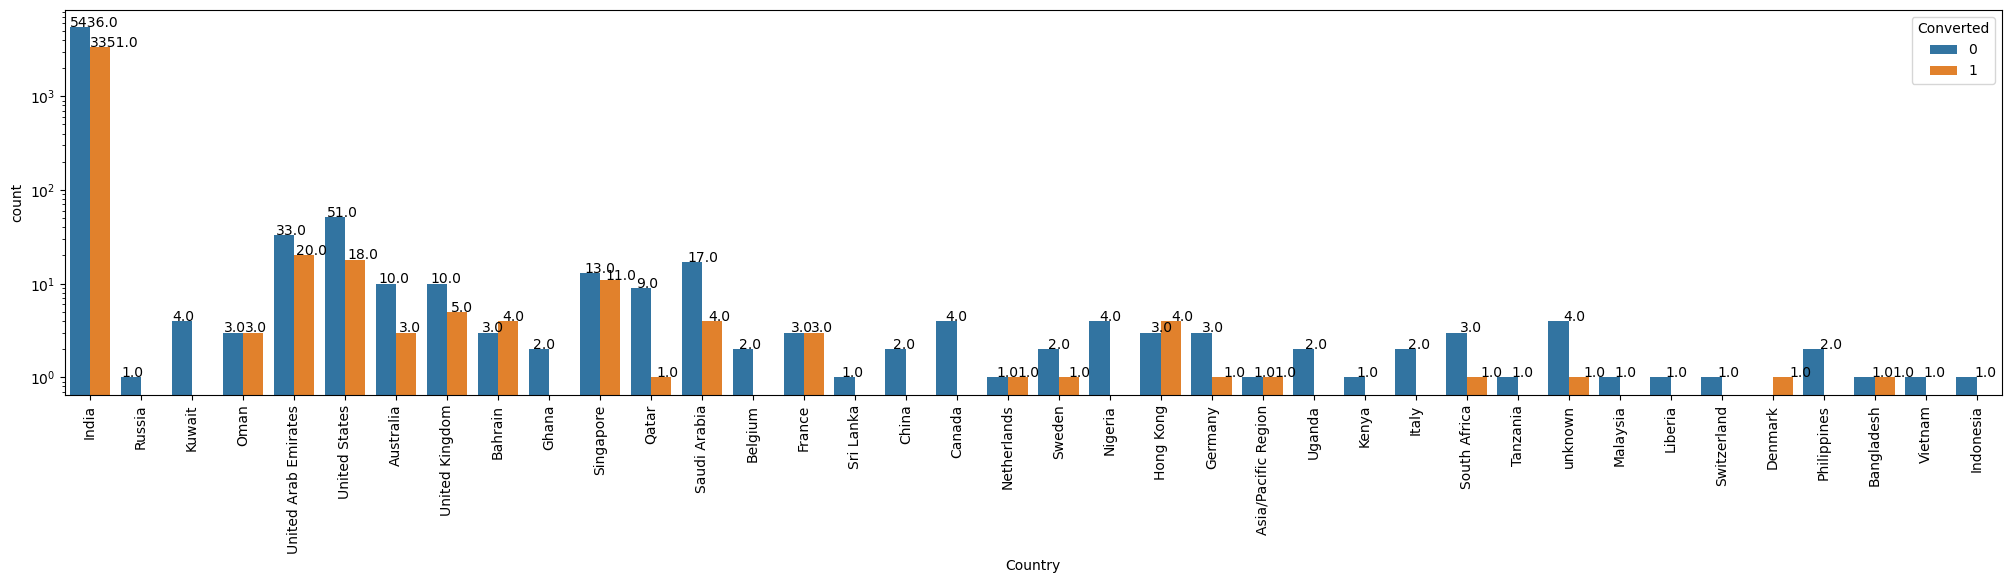

In [98]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Country", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### 📌 Interpretation & Decision

- Most of the leads are from **India**, indicating that the core business currently comes from the Indian market.
- However, there is a small but noticeable presence of leads from regions like the **US**, **Middle East**, and **Europe**.
- This suggests potential for business expansion into these regions in the future.


***

### 🔍 Specialization Analysis

This column represents the area of expertise or field in which the lead is specialized.  
Analyzing specialization helps us understand the distribution of leads across different domains and identify if any particular specialization influences lead conversion.


In [99]:
lead.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [100]:
lead.Specialization.value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

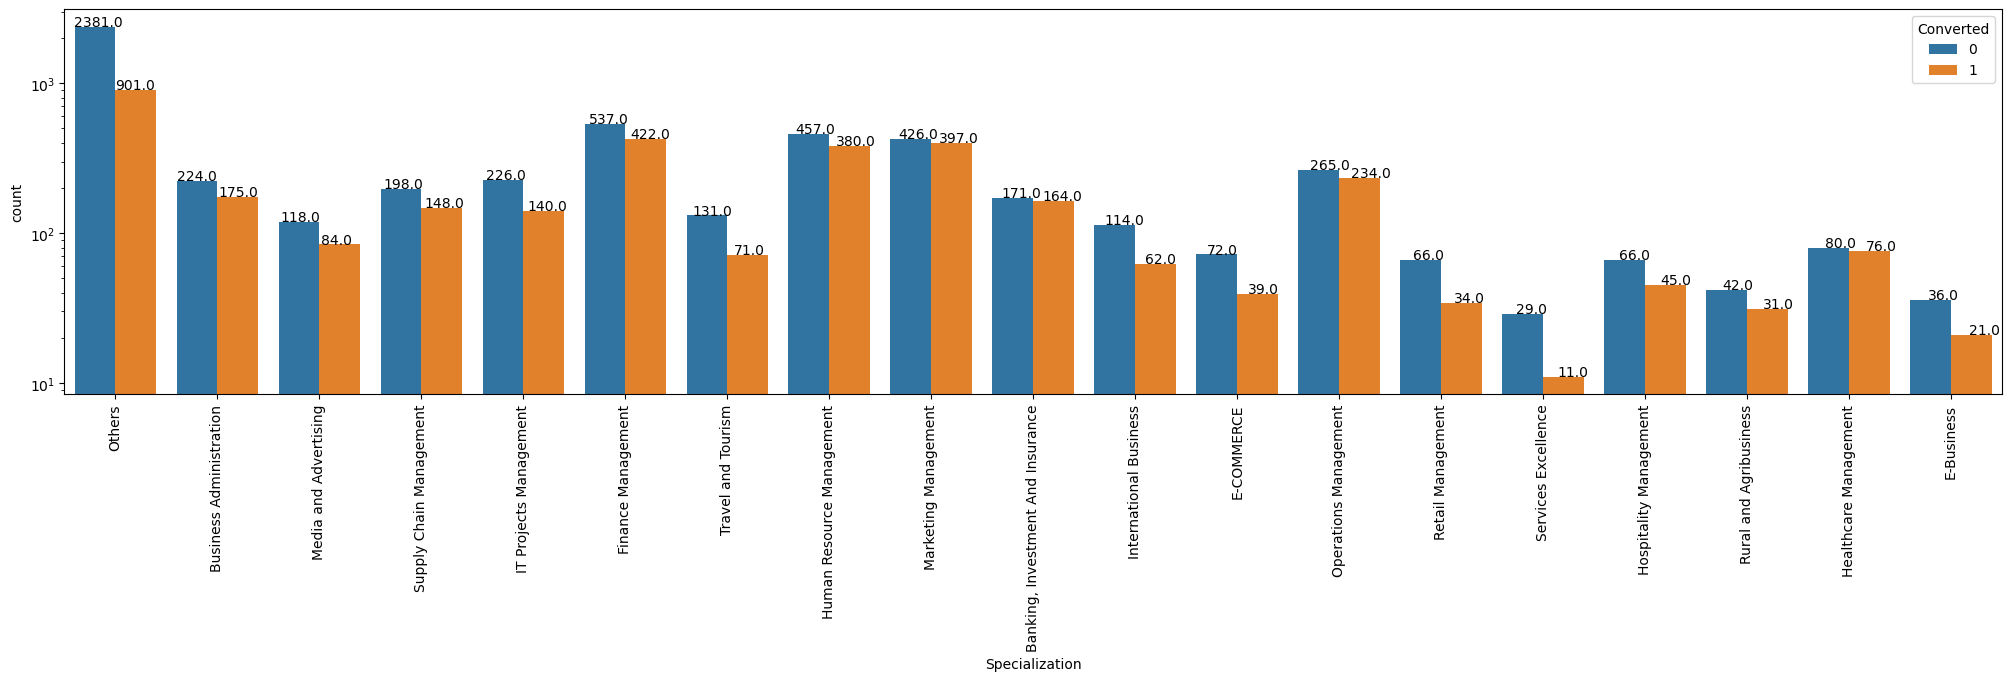

In [101]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Specialization", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

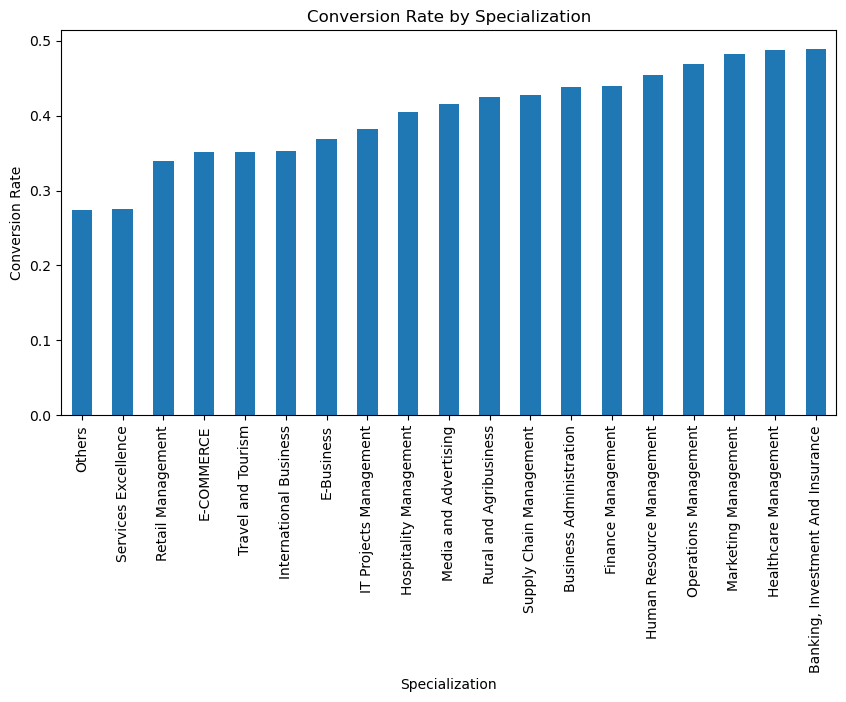

In [102]:
conv_rate = lead.groupby('Specialization')['Converted'].mean().sort_values()
conv_rate.plot(kind='bar', figsize=(10,5))
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Specialization')
plt.show()

### 📊 Conversion Rate by Specialization

The conversion rates for all specializations lie between 30% and 50%, indicating a relatively consistent performance across different fields. 

**Interpretation:**  
No particular specialization stands out with significantly higher or lower conversion rates. This suggests that specialization alone may not be a strong differentiator for lead conversion in this dataset.

**Decision:**  
We will retain the Specialization feature for modeling but consider combining it with other features or exploring further segmentation to extract more predictive value.


***

### 📊 Occupation Analysis

This column captures the current occupation status of the leads, such as employed, unemployed, student, etc. Understanding occupation distribution helps us identify key segments and tailor marketing strategies accordingly.

We will analyze how occupation relates to lead conversion to uncover any significant patterns or trends.


In [103]:
lead['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [104]:
lead['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

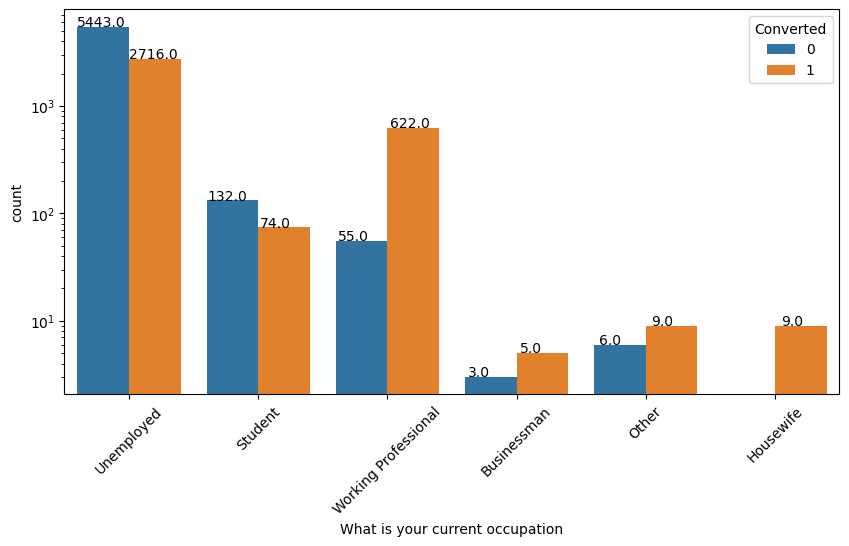

In [105]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
ax.set_yscale('log')
plt.show()

### 📌 Interpretation & Decision

- Working professionals show higher conversion rates, indicating strong interest and commitment.
- Although unemployed leads form the largest group, their conversion rate is relatively lower at around 30-35%.
- Decision: Focus marketing efforts on working professionals while also nurturing unemployed leads to improve their conversion.


***

### Analysis of "What Matters Most to You in Choosing a Course"

This column captures the primary factors influencing a lead's decision when selecting a course. Understanding these preferences helps tailor marketing messages and course offerings to better meet potential students' expectations and increase conversion rates.


In [106]:
lead['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

In [107]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

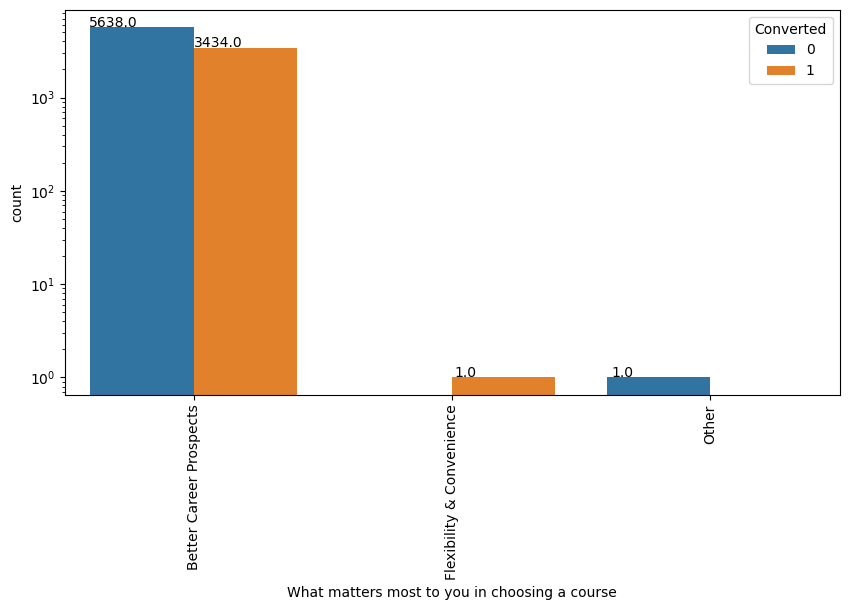

In [108]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### 📌 Interpretation

Most responses indicate **"Better Career Prospects"** as the primary reason for choosing a course. Since this option overwhelmingly dominates the data, no meaningful variation or inference can be drawn from this column for further analysis.


***

### 🔍 Search

This column indicates whether a user actively used the website’s **search feature** during their visit.

Understanding the relationship between the use of search and lead conversion can reveal whether actively searching for information correlates with higher engagement or intent to convert.


In [109]:
lead.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

In [110]:
lead.Search.value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

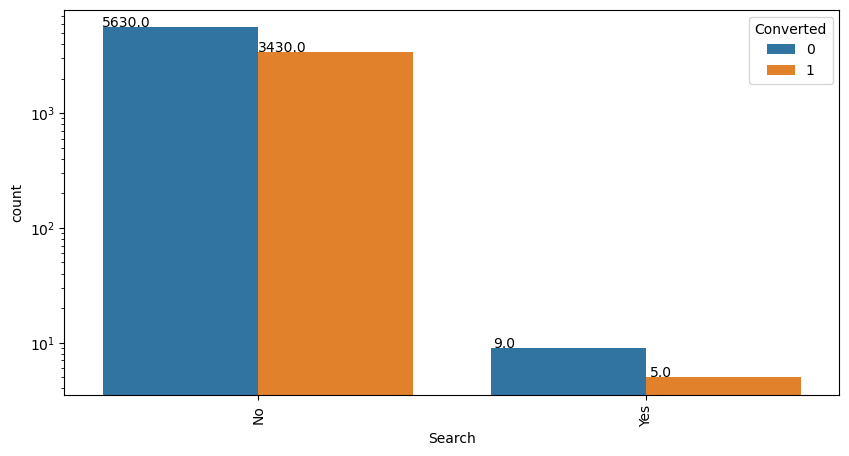

In [111]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Search", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### 📌 Interpretation & Decision

Most entries for the **Search** column are marked as `'No'`, indicating that the majority of leads did not use the search functionality.  
Due to the lack of variation and meaningful distribution, **no strong inference can be drawn** from this parameter regarding its impact on lead conversion.  
➡️ This feature may be considered for removal during feature selection.


***

### 📘 Magazine

This column indicates whether the lead interacted with a magazine campaign or not.

Analyzing this feature helps assess if the magazine marketing channel contributes to lead conversion. Given its binary nature (Yes/No), we’ll evaluate how many leads selected this option and their corresponding conversion rates.


In [112]:
lead.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

In [113]:
lead.Magazine.value_counts()

No    9074
Name: Magazine, dtype: int64

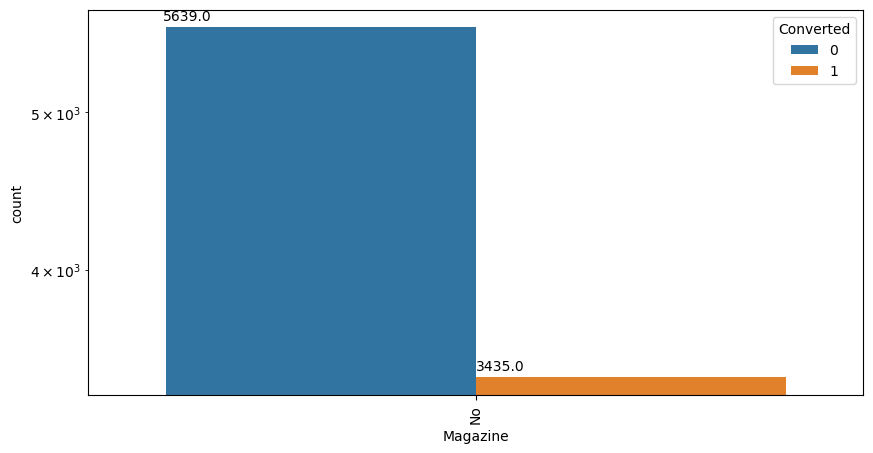

In [114]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Magazine", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### 📘 Interpretation & Decision

- **Interpretation**: All entries in the `Magazine` column are marked as `'No'`, indicating no lead has reported interaction via this channel.
- **Decision**: Since there is no variation in the data, this column does not provide any meaningful insight and can be safely dropped from the analysis.


***

### 🗞️ Newspaper Article — Analysis

This feature captures whether the lead came across the course via a **newspaper article**.

Analyzing this column helps determine if traditional media has any significant impact on attracting and converting leads. While digital channels dominate modern marketing, evaluating newspaper influence can offer insights into potential offline engagement.

We'll assess the distribution and conversion impact of this feature before deciding its usefulness in the model.


In [115]:
lead['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

In [116]:
lead['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

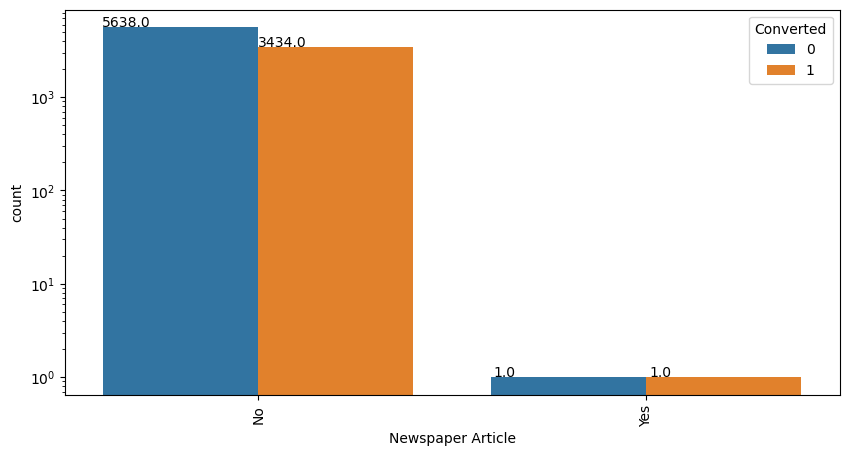

In [117]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### 📌 Interpretation

Most entries in the **Newspaper Article** column are marked as 'No'.  
Hence, no meaningful inference can be drawn from this feature.


***

### 📊 X Education Forums

This column captures whether the lead has interacted with or heard about X Education through its forums.

Analyzing this can help determine if community engagement or forum presence contributes to lead conversion.


In [118]:
lead['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

In [119]:
lead['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

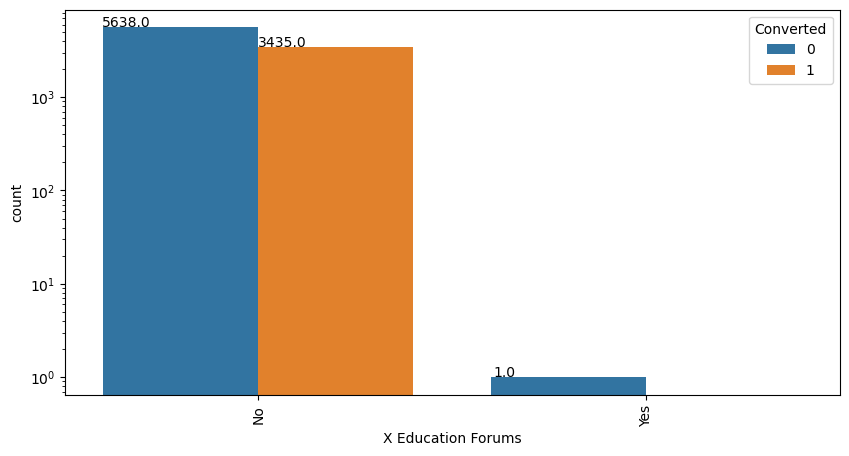

In [120]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "X Education Forums", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Interpretation

Most entries in the 'X Education Forums' column are 'No'. Therefore, no meaningful inference can be drawn from this parameter.


***

### Newspaper

This column indicates whether the lead came through a newspaper advertisement or article.

Since most entries are 'No', this feature does not provide significant information for lead conversion analysis.


In [121]:
lead['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

In [122]:
lead['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

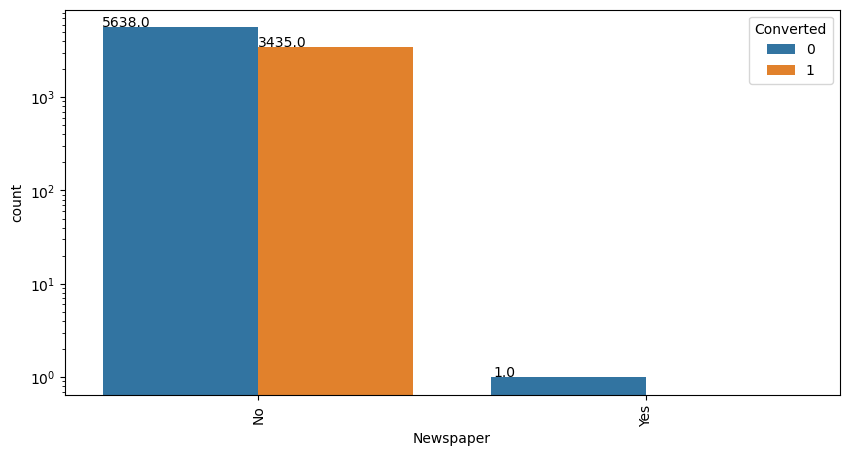

In [123]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Newspaper", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

**Interpretation:**  
Most entries in this column are 'No', indicating very few leads came through this channel. Therefore, no meaningful inference can be drawn from this parameter regarding lead conversion.


***

### Digital Advertisement

This column indicates whether the lead was acquired through digital advertisement channels.

Analyzing this helps us understand the effectiveness of digital marketing efforts in driving lead conversions.


In [124]:
lead['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [125]:
lead['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

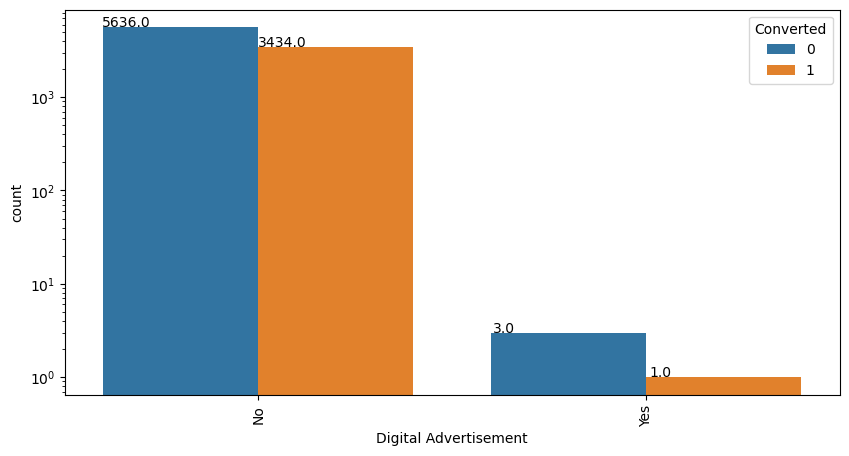

In [126]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Interpretation

Most entries in the Digital Advertisement column are 'No'. Therefore, no meaningful inference can be drawn from this parameter regarding lead conversion.


***

### Through Recommendations

This column indicates whether the lead came through recommendations. Analyzing this helps us understand the impact of word-of-mouth and referrals on lead conversion.


In [127]:
lead['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

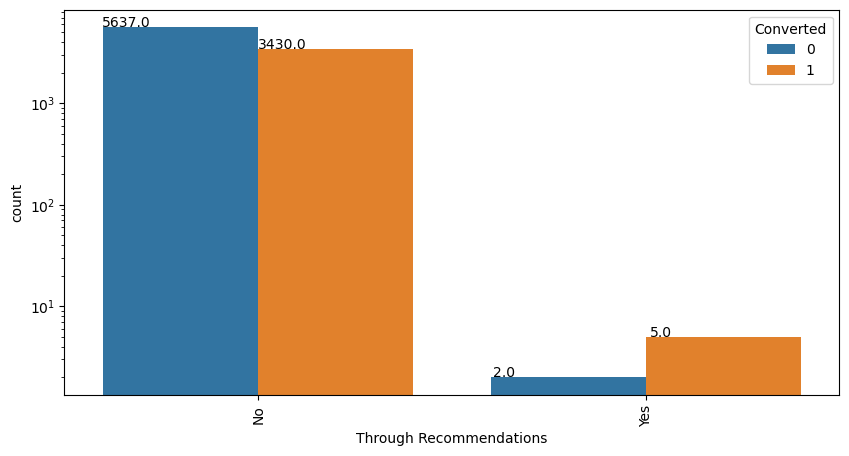

In [128]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

**Interpretation:**  
Most entries in the 'Through Recommendations' column are 'No'. Therefore, no meaningful inference can be drawn from this parameter.


***

### Receive More Updates About Our Courses

This column indicates whether the lead has opted to receive more updates about courses offered by the company. Analyzing this can help us understand if staying engaged through updates influences lead conversion.


In [129]:
lead['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

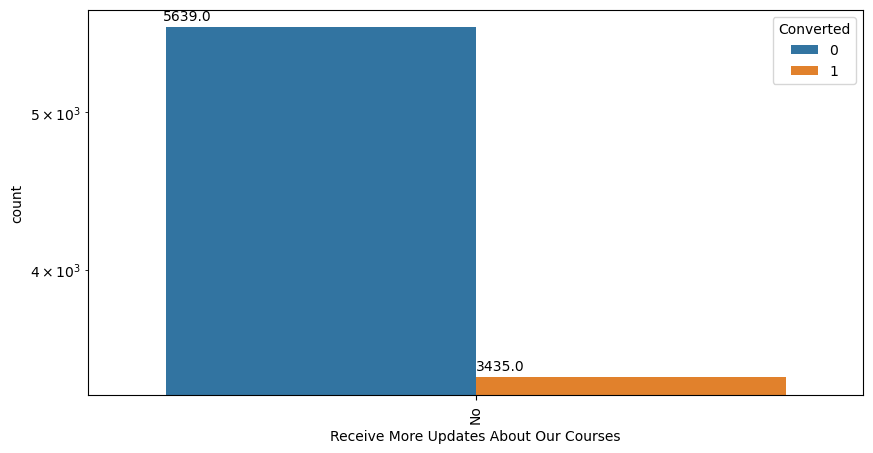

In [130]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

**Interpretation:**  
All entries in this column are 'No', so there is no variation to analyze. Hence, no meaningful inference can be drawn from this parameter.


***

### Tags

This column represents the different statuses assigned to leads, indicating their current stage or engagement level in the sales process.

Analyzing the distribution and conversion rates of various tags can help identify which lead statuses are most promising and where follow-up efforts should be focused.


In [131]:
lead.Tags.describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

In [132]:
lead.Tags.value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

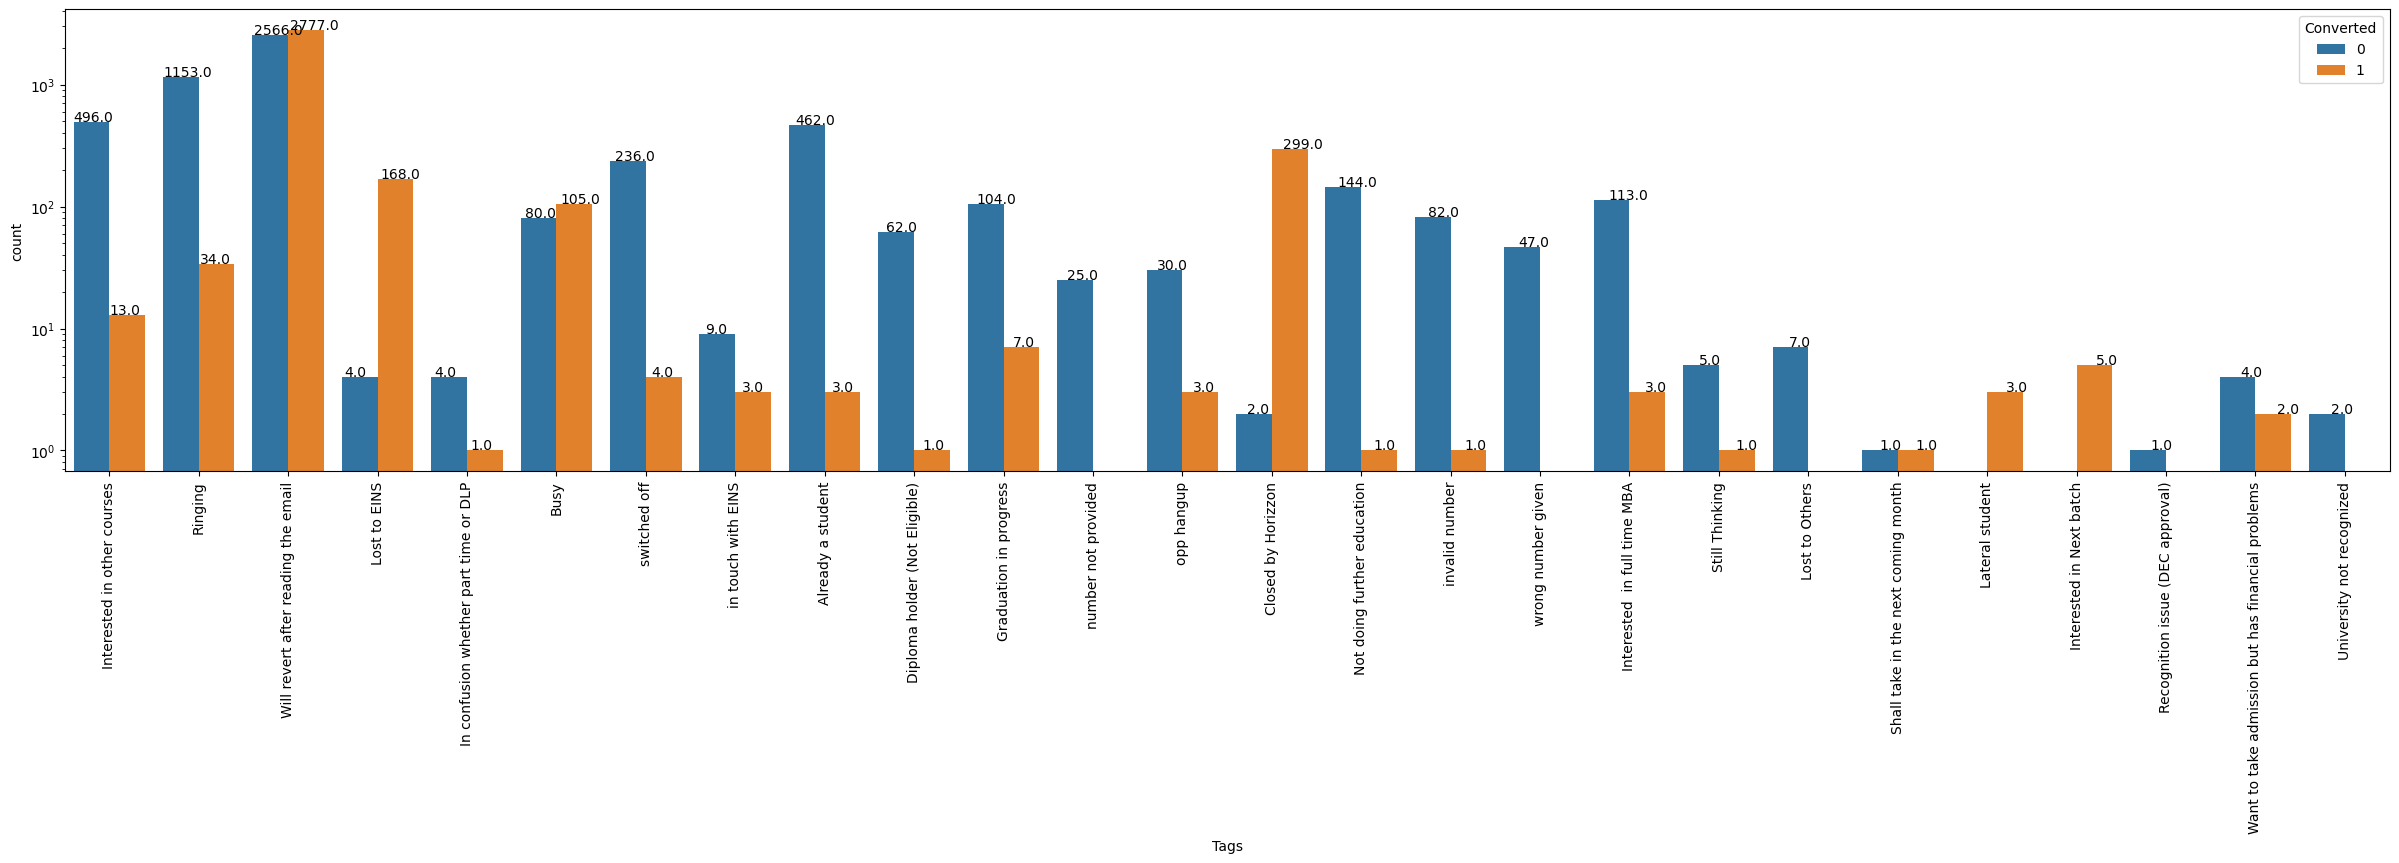

In [133]:
plt.figure(figsize = (30,6))
ax= sns.countplot(x = "Tags", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [134]:
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

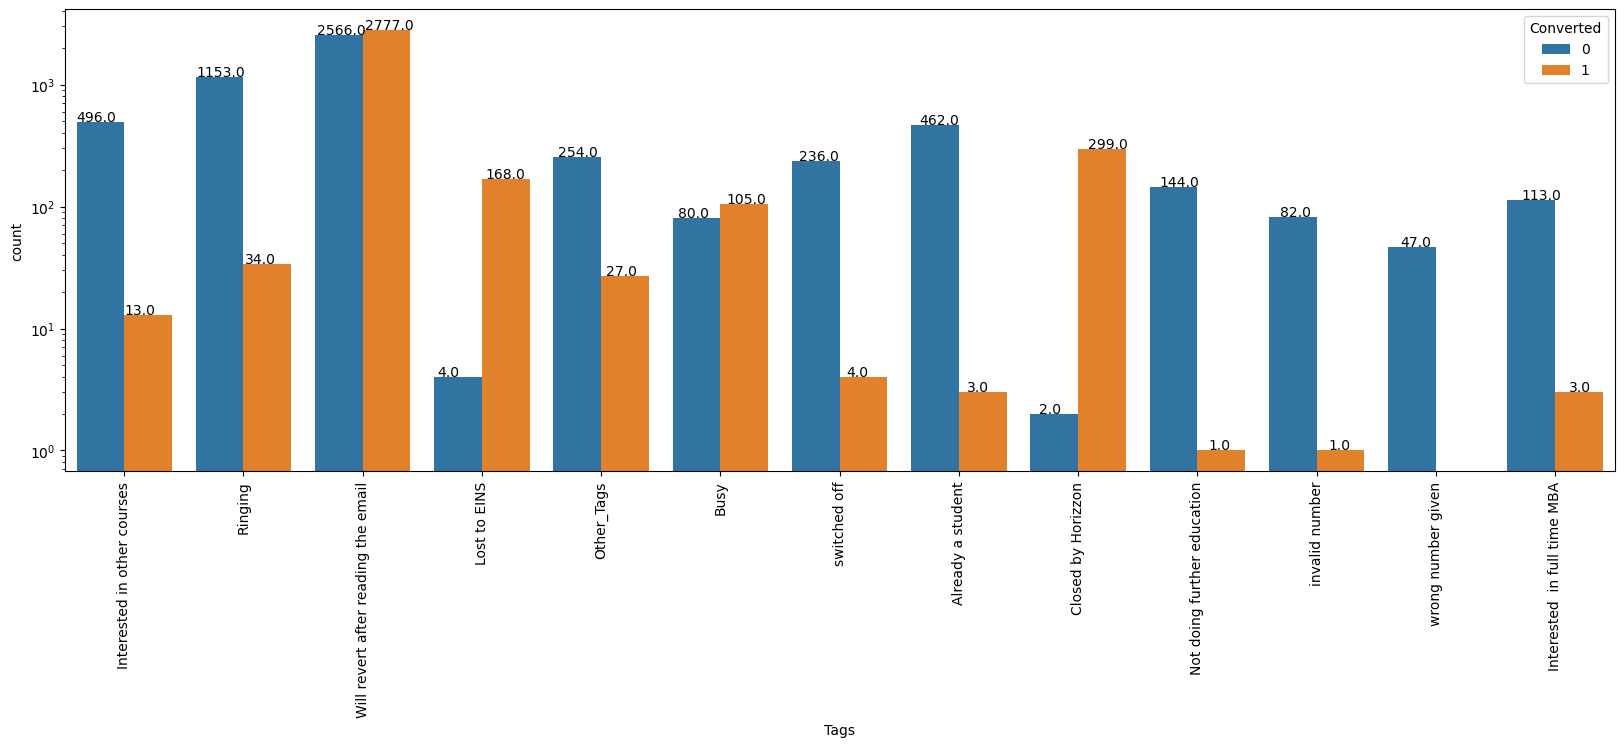

In [135]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Tags", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Interpretation of Tags

- **"Will revert after reading the email"** reflects mixed emotions; the lead may be interested or not depending on factors like mood, requirement, and email content. This tag indicates potential for conversion.

- Tags like **"Closed by Horizon"** and **"Lost to EINS"** are considered positive, suggesting good lead engagement or quality.

- Tags such as **"Invalid number"**, **"Wrong number given"**, **"Not doing further education"**, and **"Interested in full time MBA"** are negative indicators, representing low conversion potential.


***

### Lead Quality Analysis

The **Lead Quality** column represents the assessed value or potential of a lead based on various criteria.

Analyzing this feature helps us understand how lead quality impacts conversion rates and prioritize efforts on high-quality leads for better business outcomes.


In [136]:
lead['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

In [137]:
lead['Lead Quality'].value_counts()

Not Sure             5806
Might be             1519
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

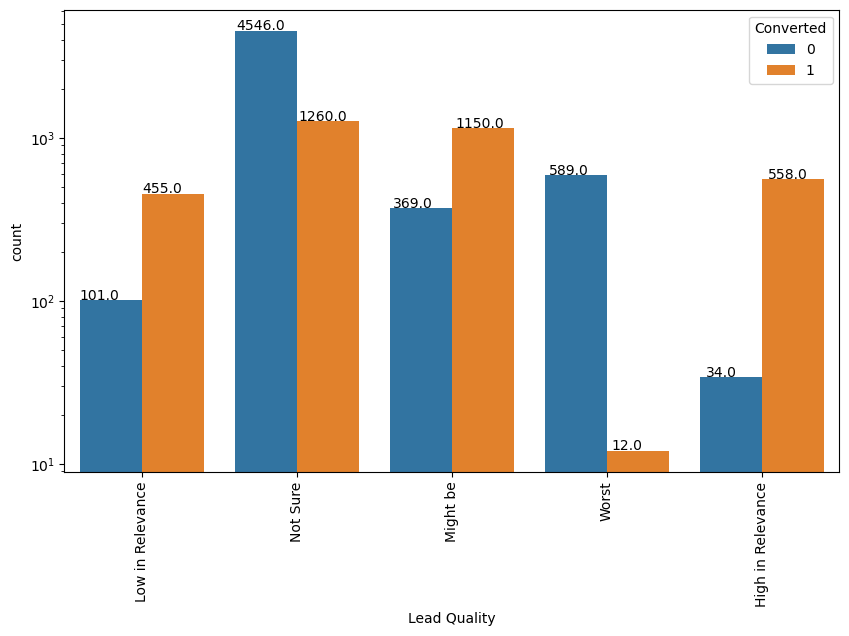

In [138]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "Lead Quality", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Lead Quality Interpretation

The category **'Not Sure'** reflects uncertainty in lead interest — depending on customer mood, needs, and communication content, these leads may or may not convert.

Leads marked as **'Worst'** indicate low potential and are less likely to result in successful conversions, thus requiring less focus.


***

### Supply Chain Content Analysis

This column indicates whether leads have engaged with Supply Chain-related content.

Analyzing this helps understand if interest in Supply Chain material impacts lead conversion and guides content strategy accordingly.


In [139]:
lead['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [140]:
lead['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

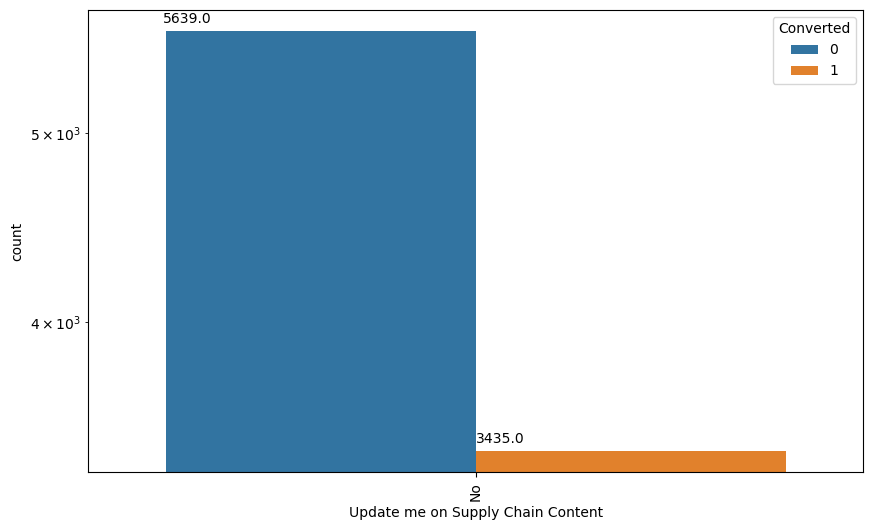

In [141]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Interpretation

All entries in the "Supply Chain Content" column are 'No'. Therefore, no meaningful inference can be drawn from this parameter.


***

### Get Updates on DM Content

This column indicates whether the lead has opted to receive updates on Direct Marketing (DM) content.



In [142]:
lead['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

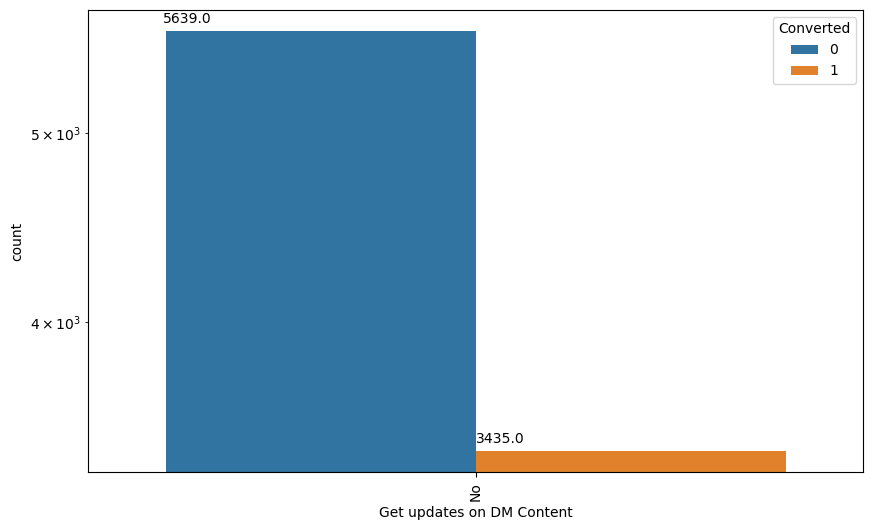

In [143]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Interpretation

Most entries are 'No', suggesting that leads generally do not opt-in for DM content updates. Hence, no significant inference can be drawn from this parameter.

***

### I Agree to Pay the Amount Through Cheque

This column shows whether the lead has agreed to pay the course fees via cheque.

In [144]:
lead['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

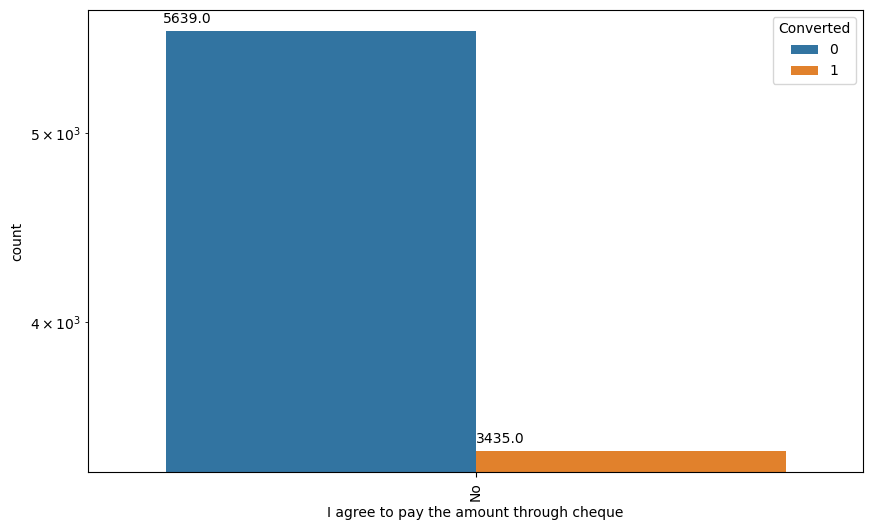

In [145]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Interpretation

Most entries are 'No', indicating that the majority of leads do not prefer cheque as a payment method. Therefore, no meaningful conclusion can be drawn from this feature.

***

### A Free Copy of Mastering The Interview

This column indicates whether the lead has requested a free copy of the "Mastering The Interview" guide.


In [146]:
lead['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

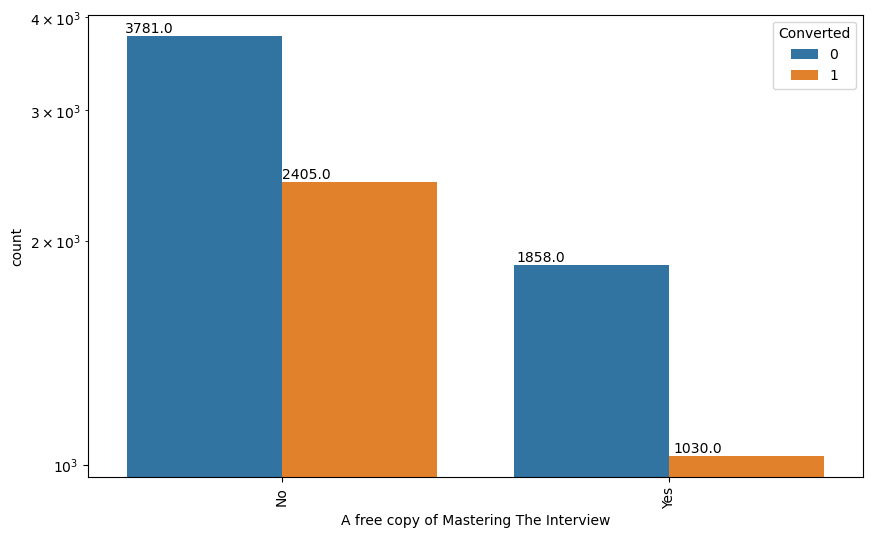

In [147]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Interpretation

Requesting a free copy of "Mastering The Interview" does not appear to influence the lead conversion decision and therefore is not a significant factor in our analysis.


***

### City

This column represents the city where the lead is located. Analyzing this helps identify geographic trends and key markets, which can guide targeted marketing and regional strategies.


In [148]:
lead.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

In [149]:
lead.City.value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

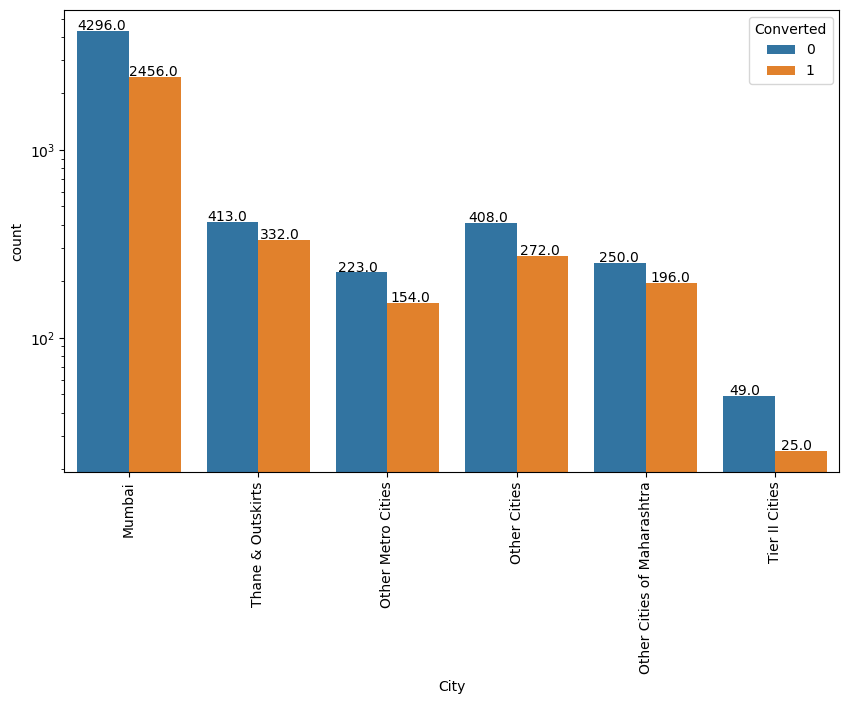

In [150]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "City", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Interpretation

Most leads are from Mumbai, contributing a significant portion of the data, with an approximate conversion rate of 30%. This indicates Mumbai as a key market for lead generation and conversions.


***

### Last Notable Activity Analysis

This column captures the most recent significant interaction or event associated with a lead. Analyzing this helps us understand which types of activities are linked to higher conversion rates and can guide follow-up strategies.


In [151]:
lead['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

In [152]:
lead['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

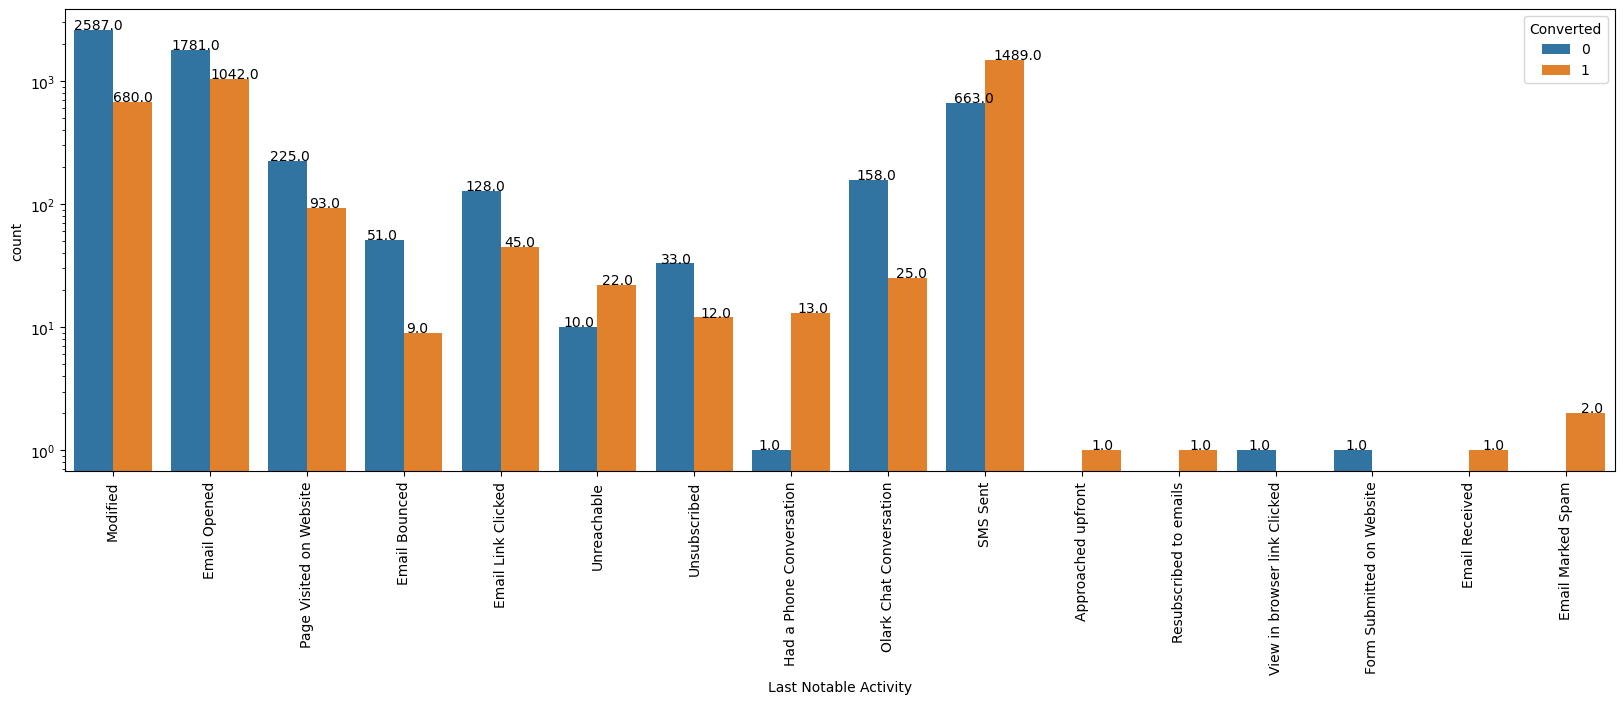

In [153]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### Interpretation
The activity 'SMS Sent' indicates a high likelihood of lead conversion, serving as a strong positive signal.


<hr style="border-top: 3px dashed #333;">

<div style="display:inline-block;
             background-color:#d1ecf1;
             color:black;
             padding:3px 6px;
             border-radius:5px;
             font-weight:bold;
             font-size:16px;">
  ✅ Final Step and Conclusion
</div>


### 📌 Interpretation & Decision

Based on the univariate analysis, we observed that several columns do not provide meaningful insights or contribute significant value to the lead conversion prediction. Therefore, we will drop these columns from the dataset to streamline the analysis and improve model efficiency.


In [154]:
lead = lead.drop(['What matters most to you in choosing a course','Search',
                  'Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview','Country'],1)

In [155]:
print("Original Columns {} % Retained".format(round((100* len(lead.columns)/len(lead_dub.columns)),2)))

Original Columns 40.54 % Retained


In [156]:
print("Original Data {} % Retained".format(round((len(lead) * 
                                                     len(lead.columns))*100/(len(lead_dub.columns)*len(lead_dub)),2)))

Original Data 39.81 % Retained


In [157]:
lead.shape

(9074, 15)

<hr style="border-top: 3px dashed #333;">

<div style="display:inline-block;
             background-color:#d1ecf1;
             color:black;
             padding:3px 6px;
             border-radius:5px;
             font-weight:bold;
             font-size:16px;">
  📌 Summary of Insights
</div>


- **High Conversion Indicators**:
  - Leads with last activity as **"SMS Sent"** showed a notably high conversion rate.
  - **More time spent on the website** and a **higher number of total visits** correlated positively with conversion likelihood.
  - **Working professionals** tend to have a higher chance of conversion compared to other occupations.
  - **Lead Source** such as *Reference* and *Welingak Website* performed well in terms of conversion.

- **Fields with No Predictive Power**:
  - Multiple columns had uniform values (e.g., `'No'` for all entries), making them irrelevant for modeling.
  - Tags and preferences like "Get updates on DM content", "Newspaper article", etc., showed no clear impact on conversion.

- **Data Cleaning Outcome**:
  - After cleaning, **~92.8%** of the data was retained for analysis.
  - Unnecessary columns and high-missing-value features were removed to improve model interpretability.




<hr style="border-top: 3px dashed #333;">

<div style="display:inline-block;
             background-color:#d1ecf1;
             color:black;
             padding:3px 6px;
             border-radius:5px;
             font-weight:bold;
             font-size:16px;">
  📌 Recommended Actions
</div>

- Focus marketing and follow-up efforts on leads showing high engagement on the platform (visits, time spent).
- Improve conversion efforts for **API** and **Landing Page Submission** leads, which are high in volume but lower in conversion.
- Leverage high-performing sources like **Reference** and **Welingak Website** to generate more leads.
- Maintain a clean and well-labeled CRM system to reduce noise in collected data and enhance decision-making.

<hr style="border-top: 3px dashed #333;">